# ST2195 Coursework
## Student number: 210345397

# Q1: When is the best time of day, day of the week, and time of year to fly to minimise delays? 

Step 1: Importing and loading required packages

Step 2: Creating a database to work in

Step 3: Data pre-processing; data-cleaning, data-trandformation, data aggregation

Step 4: Creating tables in our database

Step 5: Exploratory Data Analysis

Question 1.1: When is the best time of year to fly 

Answer 1.1: The best time of the year to fly is September

Step 6: Analysis of data by days using percentage and comparing this finding to the average minutes of delays for that day 

Question 1.2: When is the best day of the week to fly 

Answer 1.2: The best day of the week to fly is Saturday

Step 7: examining deviation of average airtime and elapse time over days of the week

Question 1.3: What is the best time of the day to fly?

Answer 1.3: The best time of the day to fly is from 0400 to 0559

## Step 1: Importing and loading required packages

In [1]:
# Accessing the functions and modules that are defined in the "operating system" module
import os

# Providing an interface for working with the SQL interface
import sqlite3
import numpy as np

# Other related and neccessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Creating a working directory

In [33]:
# Specifying which directory to use 
os.chdir("/Users/mint/Downloads/SAVES☞/dataverse_files")
os.getcwd()

'/Users/mint/Downloads/SAVES☞/dataverse_files'

In [34]:
# Setting up database in SQL
os.remove("airlinemain_py.db") #removing any database of the same name in case

In [35]:
# Setting up database in SQL
conn = sqlite3.connect("airlinemain_py.db")

## Step 3: Data pre-processing

#### After running the code, we understand that the data set is too large to be merged and analysed together. 5 Years of data have been used for quicker analysis, yet maintaining the integrity of the dataset

In [36]:
### 3.2 Merge all data frames that we want to analyse

import pandas as pd
import bz2

        
file_paths = ["2003.csv.bz2", "2004.csv.bz2", "2005.csv.bz2", "2006.csv.bz2", "2007.csv.bz2", "2008.csv.bz2"]

# Using bz2 to open the files we defined earlier and store them as data
def extract_data(file_path):
    with bz2.open(file_path, "rb") as f:
        data = pd.read_csv(f)
    return data

# Using append, bring all 5 years data into a list
data_list = []
for file_path in file_paths:
    data = extract_data(file_path)
    data_list.append(data)

df = pd.concat(data_list, ignore_index=True)
pd.options.display.max_columns = None #pandas did not show all columns as the notebook width was not wide enough

# Printing out the headers of the dataframe helps us to understand the data set and the data types present
print(df.head())
grouped_data = df.groupby("Year")
print(grouped_data.mean())

/var/folders/xw/9w62z1s15g35lwrgqzm5zq_c0000gn/T/ipykernel_38483/595535261.py:12: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(f)


   Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0  2003      1          29          3   1651.0        1655   1912.0   
1  2003      1          30          4   1654.0        1655   1910.0   
2  2003      1          31          5   1724.0        1655   1936.0   
3  2003      1           1          3   1033.0        1035   1625.0   
4  2003      1           2          4   1053.0        1035   1726.0   

   CRSArrTime UniqueCarrier  FlightNum TailNum  ActualElapsedTime  \
0        1913            UA       1017  N202UA              141.0   
1        1913            UA       1017  N311UA              136.0   
2        1913            UA       1017  N317UA              132.0   
3        1634            UA       1018  N409UA              232.0   
4        1634            UA       1018  N496UA              273.0   

   CRSElapsedTime  AirTime  ArrDelay  DepDelay Origin Dest  Distance  TaxiIn  \
0           138.0    119.0      -1.0      -4.0    ORD  MSY       837     5.0  

From "grouped_data.mean" we can see that the actual elasped time and the mean delay time has been increasing over the years

In [37]:
# Reading CSV and writing into the database
airports = pd.read_csv("airports.csv")
carriers = pd.read_csv("carriers.csv")
planes = pd.read_csv("plane-data.csv")

airports.to_sql('airports',con=conn, index=False)
carriers.to_sql('carriers',con=conn, index=False)
planes.to_sql('planes',con=conn, index=False)

5029

In [38]:
# Creating a cursor for querying
c = conn.cursor()

## Data Cleaning

In [39]:
df.dropna(inplace=True)
#print(df.describe())
#print(df.isnull().sum()) # to double check that all null values have been removed

In [40]:
df.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

## Data transformation

In [41]:
# Using integers over floating point numbers shortens the data processing time, and in this case keeps the HH MM to 4 digits
time_data = ['DepTime','ArrTime','ActualElapsedTime','CRSElapsedTime','AirTime','ArrDelay','DepDelay','TaxiIn','TaxiOut','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']
df[time_data] = df[time_data].astype(int)
df.dtypes

Year                  int64
Month                 int64
DayofMonth            int64
DayOfWeek             int64
DepTime               int64
CRSDepTime            int64
ArrTime               int64
CRSArrTime            int64
UniqueCarrier        object
FlightNum             int64
TailNum              object
ActualElapsedTime     int64
CRSElapsedTime        int64
AirTime               int64
ArrDelay              int64
DepDelay              int64
Origin               object
Dest                 object
Distance              int64
TaxiIn                int64
TaxiOut               int64
Cancelled             int64
CancellationCode     object
Diverted              int64
CarrierDelay          int64
WeatherDelay          int64
NASDelay              int64
SecurityDelay         int64
LateAircraftDelay     int64
dtype: object

In [42]:
### 3.3 Changing the integer types from 64 to 16 to reduce byte size and increase processing power

# iterate over columns and convert to int16/32
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.integer):
        if df[col].min() >= np.iinfo(np.int16).min and df[col].max() <= np.iinfo(np.int16).max:
            df[col] = df[col].astype(np.int16)
        else:
            merged_df[col] = merged_df[col].astype(np.int32)
            
# iterate over columns and convert to float16/32
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.float64):
        if df[col].min() >= np.finfo(np.float16).min and df[col].max() <= np.finfo(np.float16).max:
            df[col] = df[col].astype(np.float16)
        else:
            df[col] = df[col].astype(np.float32)

In [43]:
df.dtypes

Year                  int16
Month                 int16
DayofMonth            int16
DayOfWeek             int16
DepTime               int16
CRSDepTime            int16
ArrTime               int16
CRSArrTime            int16
UniqueCarrier        object
FlightNum             int16
TailNum              object
ActualElapsedTime     int16
CRSElapsedTime        int16
AirTime               int16
ArrDelay              int16
DepDelay              int16
Origin               object
Dest                 object
Distance              int16
TaxiIn                int16
TaxiOut               int16
Cancelled             int16
CancellationCode     object
Diverted              int16
CarrierDelay          int16
WeatherDelay          int16
NASDelay              int16
SecurityDelay         int16
LateAircraftDelay     int16
dtype: object

In [44]:
df['UniqueCarrier'].value_counts()

EV    9
B6    1
Name: UniqueCarrier, dtype: int64

After the data pre-processing stage, some of the things learnt: 
- initial df.head shows NaN values > need to drop.na
- HHMM coloumns with decimals, stored as floats
- data aggregation; mean values with 6 digit decimals > can be converted to int16 
- 'UniqueCarrier' column not useful in our analysis

## Step 4: Creating tables in our database

In [45]:
# Reading the year data into our database
ontime2003 = pd.read_csv("2003.csv.bz2") 
ontime2004 = pd.read_csv("2004.csv.bz2")
ontime2005 = pd.read_csv("2005.csv.bz2")
ontime2006 = pd.read_csv("2006.csv.bz2")
ontime2007 = pd.read_csv("2007.csv.bz2")
#ontime2008 = pd.read_csv("2008.csv.bz2") #only has 4 months, will not be included in the analysis

# Creating data tables from what we have retrieved in our database, commiting the changes we are making to the data tables
ontime2003.to_sql("ontime", con = conn, index = False, if_exists = "append")
conn.commit()

ontime2004.to_sql("ontime", con = conn, index = False, if_exists = "append")
conn.commit()

ontime2005.to_sql("ontime", con = conn, index = False, if_exists = "append")
conn.commit()

ontime2006.to_sql("ontime", con = conn, index = False, if_exists = "append")
conn.commit()

ontime2007.to_sql("ontime", con = conn, index = False, if_exists = "append")
conn.commit()

/var/folders/xw/9w62z1s15g35lwrgqzm5zq_c0000gn/T/ipykernel_38483/3232498585.py:2: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  ontime2003 = pd.read_csv("2003.csv.bz2")


## Step 5: Exploratory data analysis

### Chose to use the most recent 5 years for EDA:

- Observe past 5 years of data 
- Observe data structure and types
- Extract % Ave data to draw conclusions based on year

In [46]:
### 5.1 Create a cursor
c = conn.cursor()

In [47]:
### 5.2 Analysing data by year

# Using SQL to fetch columns relevant to our analysis
Query1ByYEAR = c.execute("""
                    SELECT Year, (AVG(Cancelled)*100), (AVG(Diverted)*100), ((CAST(SUM(CASE WHEN ArrDelay > 0 THEN 1 ELSE 0 END) AS FLOAT)/CAST(COUNT(*) AS FLOAT))*100), ((CAST(SUM(CASE WHEN DepDelay > 0 THEN 1 ELSE 0 END) AS FLOAT)/CAST(COUNT(*) AS FLOAT))*100)
                    FROM ontime
                    GROUP BY Year
                    ORDER BY Year""").fetchall()

# Understanding query using SQL
# SQL has the functions of "AVG", "CAST", "SUM"
# "FROM": clause specifies the name of the table "ontime" that the query should operate on
# "GROUP BY" clause groups the results by the "Year" column, so that the aggregates are calculated for each year separately
# "ORDER BY" clause orders the results by the year
# Query1ByYEAR: is the resulting query as a list of tuples

# Plot the data fetched into a table for easy reference
Query1ByYEAR = pd.DataFrame(Query1ByYEAR) # Store the tuple as a pandas dataframe
Query1ByYEAR = Query1ByYEAR.rename(columns={0: "Year", 1 : "% of Cancelled flights", 2 : "% of Diverted flights", 3 : "% of ArrDelayed flights", 4 : "% of DepDelayed flights"})
Query1ByYEAR

,Year,% of Cancelled flights,% of Diverted flights,% of ArrDelayed flights,% of DepDelayed flights
0,2003,1.563819,0.175402,37.625429,28.653672
1,2004,1.792007,0.193344,42.338725,33.841936
2,2005,1.872813,0.196454,42.898688,35.541305
3,2006,1.707300,0.226634,44.768985,39.564350
4,2007,2.156761,0.230491,46.335105,42.194060


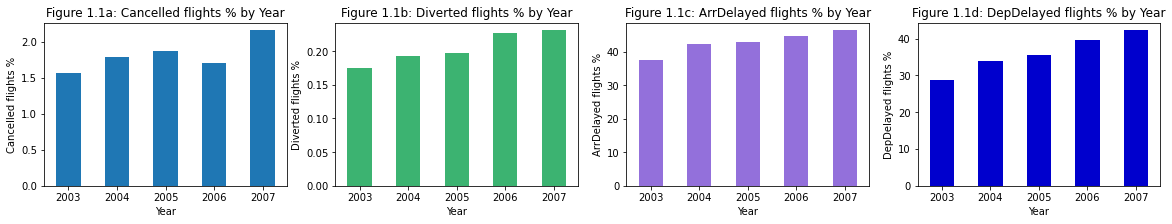

In [48]:
# Plot table according to year

Year_Names = ["2003","2004","2005","2006","2007"]

fig, ax = plt.subplots(1, 4, figsize = (20, 3))

# Creating a plot for the percentage of cancelled flights in each year from 2003 to 2007
Query1ByYEAR[["Year","% of Cancelled flights"]].plot.bar("Year", "% of Cancelled flights", ax = ax[0], alpha = 1, 
                                                  legend = False, rot = 0)

ax[0].set_xticklabels(Year_Names)
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Cancelled flights %")
ax[0].title.set_text("Figure 1.1a: Cancelled flights % by Year")

# ["Year","% of Diverted flights"]: string to be plotted in the Y and X axis respectively
# ax = ax[#]: defines the layout and properties of the plot, such as the size, position, and labels of the axes.
# alpha = 1: is a float that controls the transparency of the bars. A value of 1 means the bars are fully opaque.
# color = "mediumseagreen": is a string that sets the color of the bars, using colours already in matplotlib
# legend = False: is a boolean value that specifies whether to display a legend for the plot. In this case, the legend is turned off by setting "legend = False".
# rot = 0: is an integer that sets the rotation angle of the x-axis labels. A value of 0 means no rotation.

# Creating a plot for the percentage of diverted flights in each year from 2003 to 2007
Query1ByYEAR[["Year","% of Diverted flights"]].plot.bar("Year", "% of Diverted flights", ax = ax[1], alpha = 1, 
                                                 color = "mediumseagreen", legend = False, rot = 0)

ax[1].set_xticklabels(Year_Names)
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Diverted flights %")
ax[1].title.set_text("Figure 1.1b: Diverted flights % by Year")

# Creating a plot for the percentage of arrival delayed flights in each year from 2003 to 2007
Query1ByYEAR[["Year","% of ArrDelayed flights"]].plot.bar("Year", "% of ArrDelayed flights", ax = ax[2], alpha = 1, 
                                                color = "mediumpurple", legend = False, rot = 0)

ax[2].set_xticklabels(Year_Names)
ax[2].set_xlabel("Year")
ax[2].set_ylabel("ArrDelayed flights %")
ax[2].title.set_text("Figure 1.1c: ArrDelayed flights % by Year")

# Creating a plot for the percentage of departure delayed flights in each year from 2003 to 2007
Query1ByYEAR[["Year","% of DepDelayed flights"]].plot.bar("Year", "% of DepDelayed flights", ax = ax[3], alpha = 1, 
                                                color = "mediumblue", legend = False, rot = 0)

ax[3].set_xticklabels(Year_Names)
ax[3].set_xlabel("Year")
ax[3].set_ylabel("DepDelayed flights %")
ax[3].title.set_text("Figure 1.1d: DepDelayed flights % by Year")

(5.2) From the table Query1ByYEAR, we can see there there is an increase across all columns in terms of percentage. Further analysis is required to analyse how to apply data selection.

## Q1.1 When is the best time of the year to minimise delays? 

In [49]:
### 5.3 Analysing data by Month for 2006 (before the increase)

ontime2006.to_sql("ontime2006", con = conn, index = False, if_exists = "append") # export the dataframe to a SQlite database
conn.commit() # commit changes to the database
Query2ByMonth = c.execute("""
                    SELECT Month, (AVG(Cancelled)*100), (AVG(Diverted)*100), ((CAST(SUM(CASE WHEN ArrDelay > 0 THEN 1 ELSE 0 END) AS FLOAT)/CAST(COUNT(*) AS FLOAT))*100), ((CAST(SUM(CASE WHEN DepDelay > 0 THEN 1 ELSE 0 END) AS FLOAT)/CAST(COUNT(*) AS FLOAT))*100)
                    FROM ontime2006
                    GROUP BY Month
                    ORDER BY Month""").fetchall()

#Plot data 
Query2ByMonth = pd.DataFrame(Query2ByMonth)
Query2ByMonth = Query2ByMonth.rename(columns={0: "Month", 1 : "% of Cancelled flights", 2 : "% of Diverted flights", 3 : "% of ArrDelayed flights", 4 : "% of DepDelayed flights"})
Query2ByMonth

,Month,% of Cancelled flights,% of Diverted flights,% of ArrDelayed flights,% of DepDelayed flights
0,1,1.683678,0.235684,40.108243,34.026049
1,2,2.125753,0.246401,43.955260,37.340634
2,3,1.253435,0.173987,45.071272,38.863251
3,4,1.128212,0.175792,42.723938,36.287971
4,5,1.170472,0.205003,42.631100,36.173516
5,6,1.686068,0.302349,48.104761,44.107201
6,7,1.727984,0.302297,46.651396,45.305387
7,8,1.555989,0.249709,44.091600,40.463186
8,9,1.701038,0.211476,43.568966,35.898738
9,10,1.863440,0.201563,48.392560,40.685087


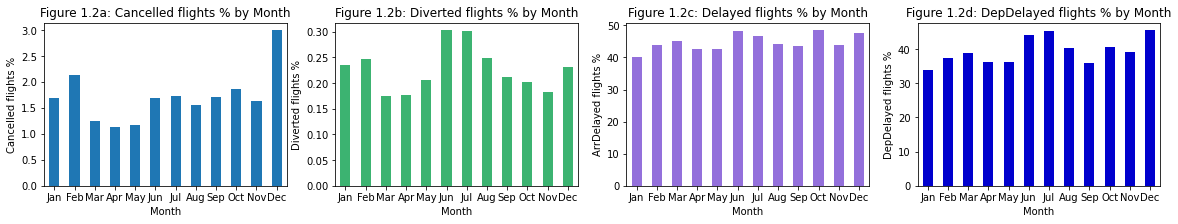

In [50]:
### 5.3.2 Plotting 2006 data by months according to
    # "Cancelled flights %"
    # "Diverted flights %"
    # "ArrDelayed flights %"
    # "DepDelayed flights %"
Month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

fig, ax = plt.subplots(1, 4, figsize = (20, 3))

# Creating a plot for the percentage of cancelled flights in each month in 2006 
Query2ByMonth[["Month","% of Cancelled flights"]].plot.bar("Month", "% of Cancelled flights", ax = ax[0], alpha = 1, 
                                                  legend = False, rot = 0)

ax[0].set_xticklabels(Month_names)
ax[0].set_xlabel("Month")
ax[0].set_ylabel("Cancelled flights %")
ax[0].title.set_text("Figure 1.2a: Cancelled flights % by Month")

# Creating a plot for the percentage of diverted flights in each month in 2006
Query2ByMonth[["Month","% of Diverted flights"]].plot.bar("Month", "% of Diverted flights", ax = ax[1], alpha = 1, 
                                                 color = "mediumseagreen", legend = False, rot = 0)

ax[1].set_xticklabels(Month_names)
ax[1].set_xlabel("Month")
ax[1].set_ylabel("Diverted flights %")
ax[1].title.set_text("Figure 1.2b: Diverted flights % by Month")

# Creating a plot for the percentage of arrival delay flights in each month in 2006
Query2ByMonth[["Month","% of ArrDelayed flights"]].plot.bar("Month", "% of ArrDelayed flights", ax = ax[2], alpha = 1, 
                                                color = "mediumpurple", legend = False, rot = 0)

ax[2].set_xticklabels(Month_names)
ax[2].set_xlabel("Month")
ax[2].set_ylabel("ArrDelayed flights %")
ax[2].title.set_text("Figure 1.2c: Delayed flights % by Month")

# Creating a plot for the percentage of departure delay flights in each month in 2006
Query2ByMonth[["Month","% of DepDelayed flights"]].plot.bar("Month", "% of DepDelayed flights", ax = ax[3], alpha = 1, 
                                                color = "mediumblue", legend = False, rot = 0)

ax[3].set_xticklabels(Month_names)
ax[3].set_xlabel("Month")
ax[3].set_ylabel("DepDelayed flights %")
ax[3].title.set_text("Figure 1.2d: DepDelayed flights % by Month")

In [51]:
### 5.4 Analysing data by Month for 2007 (after the increase)
ontime2007.to_sql("ontime2007", con = conn, index = False, if_exists = "append") # export the dataframe to a SQlite database
conn.commit() # commit changes to the database
Query3ByMonth = c.execute("""
                    SELECT Month, (AVG(Cancelled)*100), (AVG(Diverted)*100), ((CAST(SUM(CASE WHEN ArrDelay > 0 THEN 1 ELSE 0 END) AS FLOAT)/CAST(COUNT(*) AS FLOAT))*100), ((CAST(SUM(CASE WHEN DepDelay > 0 THEN 1 ELSE 0 END) AS FLOAT)/CAST(COUNT(*) AS FLOAT))*100)
                    FROM ontime2007
                    GROUP BY Month
                    ORDER BY Month""").fetchall()

#Plot data 
Query3ByMonth = pd.DataFrame(Query3ByMonth)
Query3ByMonth = Query3ByMonth.rename(columns={0: "Month", 1 : "% of Cancelled flights", 2 : "% of Diverted flights", 3 : "% of ArrDelayed flights", 4 : "% of DepDelayed flights"})
Query3ByMonth

,Month,% of Cancelled flights,% of Diverted flights,% of ArrDelayed flights,% of DepDelayed flights
0,1,2.538295,0.193063,46.067067,41.150880
1,2,4.502267,0.222948,50.238683,45.842674
2,3,2.640294,0.199465,45.894222,43.219197
3,4,1.812094,0.194095,44.424614,40.526773
4,5,1.083107,0.228306,43.592159,38.267187
5,6,2.740116,0.349447,51.876112,48.942601
6,7,2.082460,0.331504,50.351394,47.468854
7,8,1.882044,0.321608,48.554599,45.697168
8,9,1.084162,0.160283,37.613444,32.592342
9,10,1.163031,0.158732,42.873243,36.687609


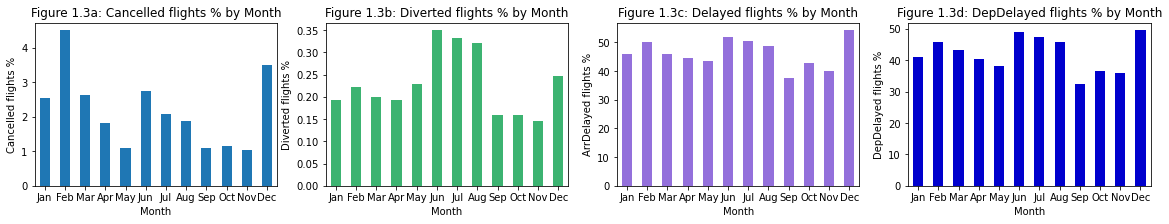

In [52]:
### 5.4.2 Plotting 2007 data by months according to
    # "Cancelled flights %"
    # "Diverted flights %"
    # "ArrDelayed flights %"
    # "DepDelayed flights %"

Month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

fig, ax = plt.subplots(1, 4, figsize = (20, 3))

# Creating a plot for the percentage of cancelled flights in each month in 2007 
Query3ByMonth[["Month","% of Cancelled flights"]].plot.bar("Month", "% of Cancelled flights", ax = ax[0], alpha = 1, 
                                                  legend = False, rot = 0)

ax[0].set_xticklabels(Month_names)
ax[0].set_xlabel("Month")
ax[0].set_ylabel("Cancelled flights %")
ax[0].title.set_text("Figure 1.3a: Cancelled flights % by Month")

# Creating a plot for the percentage of diverted flights in each month in 2007
Query3ByMonth[["Month","% of Diverted flights"]].plot.bar("Month", "% of Diverted flights", ax = ax[1], alpha = 1, 
                                                 color = "mediumseagreen", legend = False, rot = 0)

ax[1].set_xticklabels(Month_names)
ax[1].set_xlabel("Month")
ax[1].set_ylabel("Diverted flights %")
ax[1].title.set_text("Figure 1.3b: Diverted flights % by Month")

# Creating a plot for the percentage of arrival delay flights in each month in 2007
Query3ByMonth[["Month","% of ArrDelayed flights"]].plot.bar("Month", "% of ArrDelayed flights", ax = ax[2], alpha = 1, 
                                                color = "mediumpurple", legend = False, rot = 0)

ax[2].set_xticklabels(Month_names)
ax[2].set_xlabel("Month")
ax[2].set_ylabel("ArrDelayed flights %")
ax[2].title.set_text("Figure 1.3c: Delayed flights % by Month")

# Creating a plot for the percentage of departure delay flights in each month in 2007
Query3ByMonth[["Month","% of DepDelayed flights"]].plot.bar("Month", "% of DepDelayed flights", ax = ax[3], alpha = 1, 
                                                color = "mediumblue", legend = False, rot = 0)

ax[3].set_xticklabels(Month_names)
ax[3].set_xlabel("Month")
ax[3].set_ylabel("DepDelayed flights %")
ax[3].title.set_text("Figure 1.3d: DepDelayed flights % by Month")

In [53]:
### 5.5 Analysing data of 2003-2007 by month
# Using SQL to fetch columns relevant to our analysis
Query5ByMONTH = c.execute("""
                    SELECT Month, (AVG(Cancelled)*100), (AVG(Diverted)*100), ((CAST(SUM(CASE WHEN ArrDelay > 0 THEN 1 ELSE 0 END) AS FLOAT)/CAST(COUNT(*) AS FLOAT))*100), ((CAST(SUM(CASE WHEN DepDelay > 0 THEN 1 ELSE 0 END) AS FLOAT)/CAST(COUNT(*) AS FLOAT))*100)
                    FROM ontime
                    GROUP BY Month
                    ORDER BY Month""").fetchall()

# Plot the data fetched into a table for easy reference
Query5ByMONTH = pd.DataFrame(Query5ByMONTH)
Query5ByMONTH = Query5ByMONTH.rename(columns={0: "Month", 1 : "% of Cancelled flights", 2 : "% of Diverted flights", 3 : "% of ArrDelayed flights", 4 : "% of DepDelayed flights"})
Query5ByMONTH

,Month,% of Cancelled flights,% of Diverted flights,% of ArrDelayed flights,% of DepDelayed flights
0,1,2.610890,0.212723,42.533844,35.224206
1,2,2.809257,0.198979,44.317046,36.517405
2,3,1.713324,0.166539,42.233419,35.523634
3,4,1.242545,0.146724,38.969328,31.897359
4,5,1.157622,0.199559,40.054118,32.451910
5,6,1.694891,0.276191,46.875200,40.855811
6,7,1.825729,0.287152,46.375557,41.669774
7,8,1.771804,0.265729,44.098848,38.408946
8,9,1.867861,0.168267,36.534578,28.986852
9,10,1.367679,0.151527,41.507440,33.106494


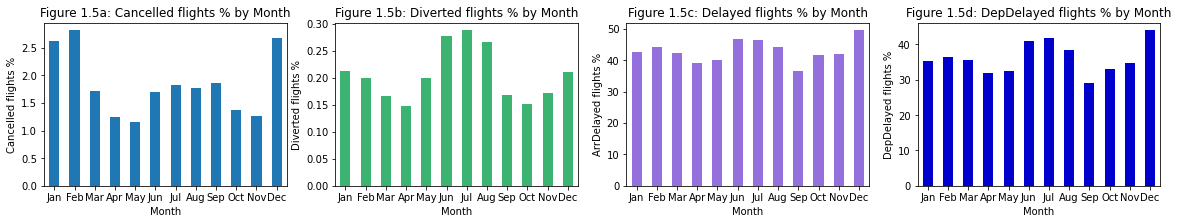

In [54]:
### 5.5.2 Plotting 2003-2007 data by months according to
# "Cancelled flights %"
# "Diverted flights %"
# "ArrDelayed flights %"
# "DepDelayed flights %"

Month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

fig, ax = plt.subplots(1, 4, figsize = (20, 3))

# Creating a plot for the percentage of cancelled flights in each month in 2007 
Query5ByMONTH[["Month","% of Cancelled flights"]].plot.bar("Month", "% of Cancelled flights", ax = ax[0], alpha = 1, 
                                                  legend = False, rot = 0)

ax[0].set_xticklabels(Month_names)
ax[0].set_xlabel("Month")
ax[0].set_ylabel("Cancelled flights %")
ax[0].title.set_text("Figure 1.5a: Cancelled flights % by Month")

# Creating a plot for the percentage of diverted flights in each month in 2007
Query5ByMONTH[["Month","% of Diverted flights"]].plot.bar("Month", "% of Diverted flights", ax = ax[1], alpha = 1, 
                                                 color = "mediumseagreen", legend = False, rot = 0)

ax[1].set_xticklabels(Month_names)
ax[1].set_xlabel("Month")
ax[1].set_ylabel("Diverted flights %")
ax[1].title.set_text("Figure 1.5b: Diverted flights % by Month")

# Creating a plot for the percentage of arrival delay flights in each month in 2007
Query5ByMONTH[["Month","% of ArrDelayed flights"]].plot.bar("Month", "% of ArrDelayed flights", ax = ax[2], alpha = 1, 
                                                color = "mediumpurple", legend = False, rot = 0)

ax[2].set_xticklabels(Month_names)
ax[2].set_xlabel("Month")
ax[2].set_ylabel("ArrDelayed flights %")
ax[2].title.set_text("Figure 1.5c: Delayed flights % by Month")

# Creating a plot for the percentage of departure delay flights in each month in 2007
Query5ByMONTH[["Month","% of DepDelayed flights"]].plot.bar("Month", "% of DepDelayed flights", ax = ax[3], alpha = 1, 
                                                color = "mediumblue", legend = False, rot = 0)

ax[3].set_xticklabels(Month_names)
ax[3].set_xlabel("Month")
ax[3].set_ylabel("DepDelayed flights %")
ax[3].title.set_text("Figure 1.5d: DepDelayed flights % by Month")

### A1.1 The best time of the year to minimise delays is September
- The percentage of cancelled flights is lowest in May
- The percentage of diverted flights is lowest in May
- The percentage of arrival delay flights is lowest in September
- The percentage of departure delay flights is lowest in September

## Step 6:
- Analyse the best day of the week using %cancellation, %diverted, %ArrDelay, %DepDelay
- Analyse if the result of the percentage is true by inspecting the average delay time for that day in comparison

## Q1.2 When is the best day of the week to minimise delays? 

In [55]:
# Querying from airlinemain_py.db database to extract information regarding 
# "Cancelled flights %"
# "Diverted flights %"
# "ArrDelayed flights %"
# "DepDelayed flights %"
# by day of week from 2003-2007

Query6a = c.execute("""
                    SELECT DayOfWeek, (AVG(Cancelled)*100), (AVG(Diverted)*100), ((CAST(SUM(CASE WHEN ArrDelay > 0 THEN 1 ELSE 0 END) AS FLOAT)/CAST(COUNT(*) AS FLOAT))*100), ((CAST(SUM(CASE WHEN DepDelay > 0 THEN 1 ELSE 0 END) AS FLOAT)/CAST(COUNT(*) AS FLOAT))*100)
                    FROM ontime
                    GROUP BY DayOfWeek
                    ORDER BY DayOfWeek""").fetchall()

# Print query results with the headers
Query6a = pd.DataFrame(Query6a)
Query6a = Query6a.rename(columns={0: "Day of Week", 1 : "% of Cancelled flights", 2 : "% of Diverted flights", 3 : "% of ArrDelayed flights", 4 : "% of DepDelayed flights"})
Query6a

,Day of Week,% of Cancelled flights,% of Diverted flights,% of ArrDelayed flights,% of DepDelayed flights
0,1,1.912387,0.202834,43.292325,36.822493
1,2,1.887828,0.199448,40.310410,32.146946
2,3,1.918263,0.209060,42.372129,33.822538
3,4,1.954935,0.220716,46.135139,38.025738
4,5,1.834625,0.212423,47.300738,40.189952
5,6,1.521788,0.179658,37.655981,34.075558
6,7,1.705569,0.208972,42.545610,37.656027


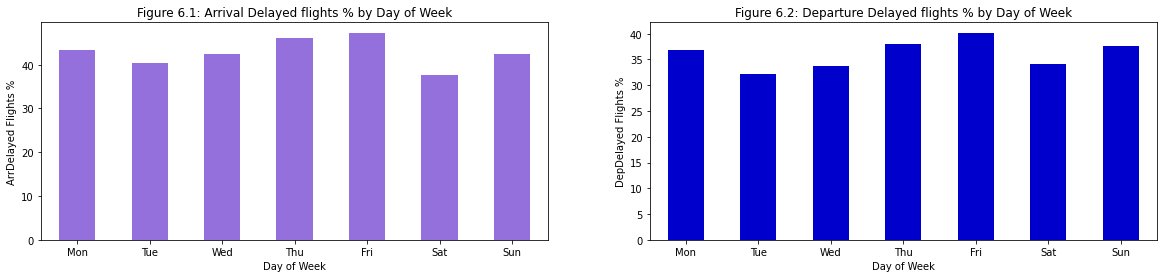

In [55]:
Day_of_week = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

fig, ax = plt.subplots(1, 2, figsize = (20, 4))

# Creating a plot for the percentage of ARRIVAL DELAY flights from 2003-2007
Query6a[["Day of Week", "% of ArrDelayed flights"]].plot.bar("Day of Week", "% of ArrDelayed flights", ax = ax[0], alpha = 1, color = "mediumpurple", legend = False, rot = 0)

ax[0].set_xticklabels(Day_of_week)
ax[0].set_xlabel("Day of Week")
ax[0].set_ylabel("ArrDelayed Flights %")
ax[0].title.set_text("Figure 6.1: Arrival Delayed flights % by Day of Week")

# Creating a plot for the percentage of DEPARTURE DELAY flights from 2003-2007
Query6a[["Day of Week", "% of DepDelayed flights"]].plot.bar("Day of Week", "% of DepDelayed flights", ax = ax[1], alpha = 1, color = "mediumblue", legend = False, rot = 0)

ax[1].set_xticklabels(Day_of_week)
ax[1].set_xlabel("Day of Week")
ax[1].set_ylabel("DepDelayed Flights %")
ax[1].title.set_text("Figure 6.2: Departure Delayed flights % by Day of Week")


In [56]:
# Querying from airlinemain_py.db database to extract information regarding average arrival delay by day of week from 2003-2007
Query6b = c.execute("""
                    SELECT DayOfWeek, AVG(ArrDelay), AVG(DepDelay)
                    FROM ontime
                    WHERE Cancelled = 0 AND Diverted = 0
                    GROUP BY DayOfWeek
                    ORDER BY DayOfWeek""").fetchall()

# Print query results with the headers
Query6b = pd.DataFrame(Query6b)
Query6b = Query6b.rename(columns={0: "Day of Week", 1 : "Avg Arrival Delay (mins)", 2 : "Avg Departure Delay (mins)"})
Query6b

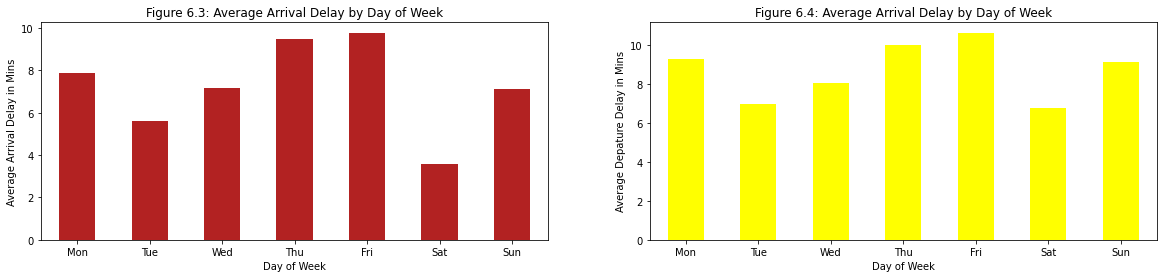

In [56]:
fig, ax = plt.subplots(1, 2, figsize = (20, 4))

# Creating a plot for the average arrival delay by day of week from 2003-2007
Query6b.plot.bar("Day of Week", "Avg Arrival Delay (mins)", ax = ax[0], alpha = 1, legend = False, rot = 0, color = "firebrick")

ax[0].set_xticklabels(Day_of_week)
ax[0].set_xlabel("Day of Week")
ax[0].set_ylabel("Average Arrival Delay in Mins")
ax[0].title.set_text("Figure 6.3: Average Arrival Delay by Day of Week")

# Creating a plot for the departure delay by day of week from 2003-2007
Query6b.plot.bar("Day of Week", "Avg Departure Delay (mins)", ax = ax[1], alpha = 1, legend = False, rot = 0, color = "Yellow")

ax[1].set_xticklabels(Day_of_week)
ax[1].set_xlabel("Day of Week")
ax[1].set_ylabel("Average Depature Delay in Mins")
ax[1].title.set_text("Figure 6.4: Average Arrival Delay by Day of Week")

### A1.2: to conclude, the best day of the week to fly to minimise delays is Saturday

- The percentage of arrival delay is the lowest on Saturday 37.65%
- The percentage of Departure delay is the lowest on Saturday 34.07%
- The percentage of Cancelled Flights is the lowest on Saturday 1.52%
- The percentage of Diverted Flights is the lowest on Saturday 0.17%

- The day with the lowest average arrival delay is Saturday 3.56 Mins
- The day with the lowest average departure delay is Saturday 6.74 Mins

Therefore the best day of the week to fly is on a Saturday, with the least overall percentage of delayed flights and overall cancellation and diverted flights

## Step 7: examining deviation of average airtime and elapse time over days of the week

In [60]:
# Determining the way time has been strucutred/ weeks from 2003-2007
Query7a = c.execute ("""
                        SELECT DayofWeek, AVG(Airtime), AVG(ActualElapsedTime)
                        FROM ontime
                        GROUP by DayOfWeek
                        ORDER by DayOfWeek""").fetchall()

# Printing out query
Query7a = pd.DataFrame(Query7a)
Query7a = Query7a.rename(columns={0: "Day of Week", 1 : "Avg Airtime", 2 : "Avg Elaspse Time"})
Query7a

,Day of Week,Avg Airtime,Avg Elaspse Time
0,1,102.005324,124.039200
1,2,101.873278,123.690039
2,3,102.014820,124.241430
3,4,102.216235,124.897333
4,5,102.161562,124.510190
5,6,105.623137,126.129132
6,7,103.335456,125.116754


From the observation above, average airtime and elapse time does not deviate much across the days of the week, hence we can analyse the best time of the day according to the total data set.

## Q1.3: What is the best time of the day to fly to minimise delays? 

In [89]:
# Query from airlinemain_py.db database to extract time according to HH MM format to understand flights that were delayed in that particular hour from 2003-2007
# Diverted flights % by hour
# Arrival Delayed flights % by hour
# Departure Delayed flights % by hour
Query7b = c.execute("""
    SELECT 
        AVG(Cancelled)*100, 
        AVG(Diverted)*100, 
        (CAST(SUM(CASE WHEN ArrDelay > 0 THEN 1 ELSE 0 END) AS FLOAT)/CAST(COUNT(*) AS FLOAT))*100, 
        (CAST(SUM(CASE WHEN DepDelay > 0 THEN 1 ELSE 0 END) AS FLOAT)/CAST(COUNT(*) AS FLOAT))*100,
        CASE 
            WHEN CRSDepTime BETWEEN 0000 AND 0159 THEN '0000 to 0159'
            WHEN CRSDepTime BETWEEN 0200 AND 0359 THEN '0200 to 0359'
            WHEN CRSDepTime BETWEEN 0400 AND 0559 THEN '0400 to 0559'
            WHEN CRSDepTime BETWEEN 0600 AND 0759 THEN '0600 to 0759'
            WHEN CRSDepTime BETWEEN 0800 AND 0959 THEN '0800 to 0959'
            WHEN CRSDepTime BETWEEN 1000 AND 1159 THEN '1000 to 1159'
            WHEN CRSDepTime BETWEEN 1200 AND 1359 THEN '1200 to 1359'
            WHEN CRSDepTime BETWEEN 1400 AND 1559 THEN '1400 to 1559'
            WHEN CRSDepTime BETWEEN 1600 AND 1759 THEN '1600 to 1759'
            WHEN CRSDepTime BETWEEN 1800 AND 1959 THEN '1800 to 1959'
            WHEN CRSDepTime BETWEEN 2000 AND 2159 THEN '2000 to 2159'
            WHEN CRSDepTime BETWEEN 2200 AND 2359 THEN '2200 to 2359'
            END AS TimeFrame
    FROM ontime
    GROUP BY 
        CASE 
            WHEN CRSDepTime BETWEEN 0000 AND 0159 THEN '0000 to 0159'
            WHEN CRSDepTime BETWEEN 0200 AND 0359 THEN '0200 to 0359'
            WHEN CRSDepTime BETWEEN 0400 AND 0559 THEN '0400 to 0559'
            WHEN CRSDepTime BETWEEN 0600 AND 0759 THEN '0600 to 0759'
            WHEN CRSDepTime BETWEEN 0800 AND 0959 THEN '0800 to 0959'
            WHEN CRSDepTime BETWEEN 1000 AND 1159 THEN '1000 to 1159'
            WHEN CRSDepTime BETWEEN 1200 AND 1359 THEN '1200 to 1359'
            WHEN CRSDepTime BETWEEN 1400 AND 1559 THEN '1400 to 1559'
            WHEN CRSDepTime BETWEEN 1600 AND 1759 THEN '1600 to 1759'
            WHEN CRSDepTime BETWEEN 1800 AND 1959 THEN '1800 to 1959'
            WHEN CRSDepTime BETWEEN 2000 AND 2159 THEN '2000 to 2159'
            WHEN CRSDepTime BETWEEN 2200 AND 2359 THEN '2200 to 2359'
            END
    ORDER BY TimeFrame""").fetchall()

# Printing out queries
Query7b = pd.DataFrame(Query7b)
Query7b = Query7b.dropna()
Query7b = Query7b[[4,0,1,2,3]] # Using indexing to rearrange columns
Query7b = Query7b.rename(columns={4 : "Time interval", 0 : "% of Cancelled flights", 1 : "% of Diverted flights", 2 : "% of Arr Delayed flights", 3 : "% of Dep Delayed flights"})
Query7b

,Time interval,% of Cancelled flights,% of Diverted flights,% of Arr Delayed flights,% of Dep Delayed flights
1,0000 to 0159,0.578019,0.197271,38.237526,31.879320
2,0200 to 0359,0.818030,0.166945,38.247078,32.186978
3,0400 to 0559,2.380317,0.235240,28.988304,16.124410
4,0600 to 0759,1.651834,0.207087,32.772365,19.828626
5,0800 to 0959,1.546279,0.169943,37.637056,27.319040
6,1000 to 1159,1.643238,0.189949,40.462033,33.580356
7,1200 to 1359,1.676225,0.233484,42.927632,36.707998
8,1400 to 1559,1.902087,0.241357,46.524202,41.632159
9,1600 to 1759,2.241279,0.228021,48.851801,44.625941
10,1800 to 1959,2.193764,0.192557,49.506666,45.455764


In [91]:
Query7b.dtypes  # check data types of columns in Query7b

Time interval                object
% of Cancelled flights      float64
% of Diverted flights       float64
% of Arr Delayed flights    float64
% of Dep Delayed flights    float64
dtype: object

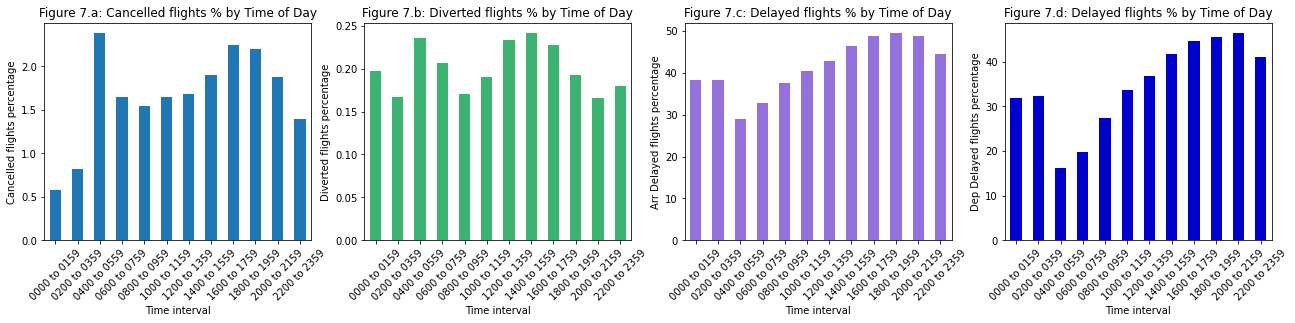

In [94]:
Time_interval_names = ["0000 to 0159", "0200 to 0359", "0400 to 0559", "0600 to 0759", "0800 to 0959", "1000 to 1159", "1200 to 1359", "1400 to 1559", "1600 to 1759", "1800 to 1959", "2000 to 2159", "2200 to 2359"]

fig, ax = plt.subplots(1, 4, figsize = (22, 4))

# Creating a plot for the percentage of cancelled flights by hour
Query7b[["Time interval","% of Cancelled flights"]].plot(x="Time interval", y="% of Cancelled flights", kind="bar", ax = ax[0], alpha = 1, legend = False, rot = 45)

ax[0].set_xticklabels(Time_interval_names)
ax[0].set_xlabel("Time interval")
ax[0].set_ylabel("Cancelled flights percentage")
ax[0].set_title("Figure 7.a: Cancelled flights % by Time of Day")

# Creating a plot for the percentage of diverted flights by hour
Query7b[["Time interval","% of Diverted flights"]].plot(x="Time interval", y="% of Diverted flights", kind="bar", ax = ax[1], alpha = 1, legend = False, rot = 45, color = "mediumseagreen")

ax[1].set_xticklabels(Time_interval_names)
ax[1].set_xlabel("Time interval")
ax[1].set_ylabel("Diverted flights percentage")
ax[1].set_title("Figure 7.b: Diverted flights % by Time of Day")

#Creating a plot for the percentage of Arrival Delayed flights by hour
Query7b[["Time interval","% of Arr Delayed flights"]].plot(x="Time interval", y="% of Arr Delayed flights", kind="bar", ax = ax[2], alpha = 1, legend = False, rot = 45, color = "mediumpurple")

ax[2].set_xticklabels(Time_interval_names)
ax[2].set_xlabel("Time interval")
ax[2].set_ylabel("Arr Delayed flights percentage")
ax[2].set_title("Figure 7.c: Delayed flights % by Time of Day")

# Creating a plot for the percentage of Departure Delayed flights by hour
Query7b[["Time interval","% of Dep Delayed flights"]].plot(x="Time interval", y="% of Dep Delayed flights", kind="bar", ax = ax[3], alpha = 1, legend = False, rot = 45, color = "mediumblue")

ax[3].set_xticklabels(Time_interval_names)
ax[3].set_xlabel("Time interval")
ax[3].set_ylabel("Dep Delayed flights percentage")
ax[3].set_title("Figure 7.d: Delayed flights % by Time of Day")

plt.show()

- Figure 7a. shows that the percentage of cancelled flights by the hour is lowest from 0000 to 0159 (0.578019%)
- Figure 7b. shows that the percentage of diverted flights by the hour is lowest from 2000 to 2159 (0.166174%)
- Figure 7c. shows that the percentage of arrival delayed flights by the hour is lowest from 0400 to 0559 (28.988304%)
- Figure 7d. shows that the percentage of departure delayed flights by the hour is lowest from 0400 to 0559 (16.124410%)

In [103]:
Query7c = c.execute("""
    SELECT 
        (AVG(ArrDelay)),
        (AVG(DepDelay)),
        CASE 
            WHEN CRSDepTime BETWEEN 0000 AND 0159 THEN '0000 to 0159'
            WHEN CRSDepTime BETWEEN 0200 AND 0359 THEN '0200 to 0359'
            WHEN CRSDepTime BETWEEN 0400 AND 0559 THEN '0400 to 0559'
            WHEN CRSDepTime BETWEEN 0600 AND 0759 THEN '0600 to 0759'
            WHEN CRSDepTime BETWEEN 0800 AND 0959 THEN '0800 to 0959'
            WHEN CRSDepTime BETWEEN 1000 AND 1159 THEN '1000 to 1159'
            WHEN CRSDepTime BETWEEN 1200 AND 1359 THEN '1200 to 1359'
            WHEN CRSDepTime BETWEEN 1400 AND 1559 THEN '1400 to 1559'
            WHEN CRSDepTime BETWEEN 1600 AND 1759 THEN '1600 to 1759'
            WHEN CRSDepTime BETWEEN 1800 AND 1959 THEN '1800 to 1959'
            WHEN CRSDepTime BETWEEN 2000 AND 2159 THEN '2000 to 2159'
            WHEN CRSDepTime BETWEEN 2200 AND 2359 THEN '2200 to 2359'
        END AS TimeFrame
    FROM ontime
    GROUP BY 
        CASE 
            WHEN CRSDepTime BETWEEN 0000 AND 0159 THEN '0000 to 0159'
            WHEN CRSDepTime BETWEEN 0200 AND 0359 THEN '0200 to 0359'
            WHEN CRSDepTime BETWEEN 0400 AND 0559 THEN '0400 to 0559'
            WHEN CRSDepTime BETWEEN 0600 AND 0759 THEN '0600 to 0759'
            WHEN CRSDepTime BETWEEN 0800 AND 0959 THEN '0800 to 0959'
            WHEN CRSDepTime BETWEEN 1000 AND 1159 THEN '1000 to 1159'
            WHEN CRSDepTime BETWEEN 1200 AND 1359 THEN '1200 to 1359'
            WHEN CRSDepTime BETWEEN 1400 AND 1559 THEN '1400 to 1559'
            WHEN CRSDepTime BETWEEN 1600 AND 1759 THEN '1600 to 1759'
            WHEN CRSDepTime BETWEEN 1800 AND 1959 THEN '1800 to 1959'
            WHEN CRSDepTime BETWEEN 2000 AND 2159 THEN '2000 to 2159'
            WHEN CRSDepTime BETWEEN 2200 AND 2359 THEN '2200 to 2359'
        END
    ORDER BY TimeFrame""").fetchall()

# Finding the time of day with the least Arrival and Departure Delay
Query7c = pd.DataFrame(Query7c)
Query7c = Query7c[[2,0,1]] #re-indexing to put the time frame first
Query7c = Query7c.rename(columns={2 : "Time interval", 0 : "Avg Arrival Delay (mins)", 1 : "Avg Departure Delay (mins)"})
Query7c

,Time interval,Avg Arrival Delay (mins),Avg Departure Delay (mins)
0,None,42.000000,38.000000
1,0000 to 0159,1.553381,4.258832
2,0200 to 0359,1.563649,4.563541
3,0400 to 0559,-0.482690,1.680175
4,0600 to 0759,0.370391,1.828089
5,0800 to 0959,2.485125,3.932771
6,1000 to 1159,4.237015,5.910911
7,1200 to 1359,6.556244,7.936027
8,1400 to 1559,9.786894,10.685485
9,1600 to 1759,12.576617,13.481167


### A1.3: The best time of the day to fly to minimise delays is from 0400 to 0559, where there is an average of early arrival (0.482 mins) and the lowest average departure delay (1.680 mins)

In [107]:
# Ending the kernel, closing the connection to main database
#conn.close()

# ------------------------------------------------------

# Q2 : Do older planes suffer more delays?

## Step 1: Importing database and creating plane data table

In [169]:
os.remove("planedata.db") #removing any database of the same name in case

In [170]:
# Create database for plane data
conn = sqlite3.connect("planedata.db")

In [171]:
# Setting up database in SQL
planedata = pd.read_csv("plane-data.csv")
planedata.to_sql("planes", conn, index = False)

# Create cursor
c = conn.cursor()

## Step 2: Understanding plane-data.csv

In [172]:
# Understanding the plane data 
planedata.head()

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,N050AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N051AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N052AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N054AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N055AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Understandng the age of older planes by analysing the parameters: 
- unique carrier code
- year 
- plane tail number 

### How to connect the plane tail number, age of the plane, delay of the plane together


### Steps to take
- min and max age of the plane 
- why did we limit the max and min age of the plane, cuz we know that the max manufacturere year has to be limited in order to prevent lack on NA data output. The minimun plane manufacuturing year has to be set to prevent the lack of value of 0000. >> pls explain this better in the report
- take out the planes that are erroneous so that the data is cleaner

## Step 3: Querying the database to identify and remove erroneous data

In [173]:
# Querying the maximum year that the planes were created
Q2manufactureyearmax = c.execute("""
                                    SELECT max(year)
                                    FROM planes
                                    WHERE year < 2100""")

Q2manufactureyearmax = pd.DataFrame(Q2manufactureyearmax) # Importing to pandas dataframe

# Renaming column of the dataframe holding the query result. 
Q2manufactureyearmax = Q2manufactureyearmax.rename(columns={0 : "Latest Year of Manufacture"})
Q2manufactureyearmax

,Latest Year of Manufacture
0,2008


In [174]:
# Querying the minimun year that the planes were created
Q2manufactureyearmin = c.execute("""
                                    SELECT min(year)
                                    FROM planes
                                    WHERE year > 1900""")

Q2manufactureyearmin = pd.DataFrame(Q2manufactureyearmin) # Importing to pandas dataframe

# Renaming column of the dataframe holding the query result. 
Q2manufactureyearmin = Q2manufactureyearmin.rename(columns={0 : "Oldest Year of Manufacture"})
Q2manufactureyearmin

,Oldest Year of Manufacture
0,1946


#### Observations from the table above: 

- discuss by year data (number of errornous data per year etc)
- observations of the erroneous data are values that are negative in the "Age of Plane" column. Query results may be due to the assumptions of manufacturing date of the plane being incorrect (REDO)
- not much queries to explain since the data that is not related the the plane data is just removed
- talk abit about the erroneous data and how they possible came about i guesss

In [184]:
# Removing erronous data
# Any year of manufacture > year of flight = erronous

# Using SQL to join database from Planes and Ontime 
Q2erroneous = c.execute("""
                            SELECT ontime.Year, planes.year, (ontime.Year - planes.year)
                            FROM ontime JOIN planes ON ontime.TailNum = planes.tailnum
                            WHERE (ontime.Year - planes.year) < 0
                            ORDER BY (ontime.Year - planes.year)""")

# Printing age of erronous data in pandas to understand the number of discrpencies in the database 
Q2erroneous = pd.DataFrame(Q2erroneous)
Q2erroneous = Q2erroneous.rename(columns={0 : "Year of flight", 1 : "Year of Manufacture", 2 : "Age of Plane"})
Q2erroneous

OperationalError: no such table: ontime

Observe that there are 7906 rows of Age of Plane data that is negative, hence when answering question 2 we must be wary to only include data with plane age more than 0 

## Step 4: Querying cleaned database for plane age data

In [148]:
# Joining the ontime database to the planedata database using the tailnumber key
Q2total = c.execute("""
                        SELECT ontime.Year, planes.year, (ontime.Year - planes.year)
                        FROM ontime 
                        JOIN planes ON ontime.TailNum = planes.tailnum 
                        ORDER BY (ontime.Year - planes.year)""").fetchall()

# Renaming columns of the dataframe holding the query result. 
#Q2total = Q2total.rename(columns={0 : "Year of flight", 1 : "Year of Manufacture", 2 : "Age of Plane"})
# Convert the query result from a list to a DataFrame
Q2total = pd.DataFrame(Q2total, columns=["Year of flight", "Year of Manufacture", "Age of Plane"])

# Rename the columns of the DataFrame
Q2total = Q2total.rename(columns={"Year of flight": "Year of Flight", "Year of Manufacture": "Year of Manufacture", "Age of Plane": "Age of Plane"})

# Display the DataFrame
Q2total

OperationalError: no such table: ontime

In [149]:
Q2total.dropna()

,Year of Flight,Year of Manufacture,Age of Plane
1643663,2003,2007,-4.0
1643664,2003,2007,-4.0
1643665,2003,2007,-4.0
1643666,2003,2007,-4.0
1643667,2003,2007,-4.0
...,...,...,...
26705388,2007,None,2007.0
26705389,2007,None,2007.0
26705390,2007,None,2007.0
26705391,2007,None,2007.0


In [150]:
# Querying the database to extract information regarding the year of the plane manufacturing, age of the plane and year the plane was flown
Q2distribution = c.execute("""
                              SELECT ontime.Year, planes.year, (ontime.Year - planes.year)
                              FROM ontime JOIN planes ON ontime.TailNum = planes.tailnum
                              WHERE (ontime.Year - planes.year) > -1 AND (ontime.Year - planes.year) < 62
                              ORDER BY (ontime.Year - planes.year)""")

# Viewing the distribution queried in a table form
Q2distribution = pd.DataFrame(Q2distribution)
# Renaming columns of the dataframe holding the query result. 
Q2distribution = Q2distribution.rename(columns={0 : "Year of flight", 1 : "Year of Manufacture", 2 : "Age of Plane"})
Q2distribution

OperationalError: no such table: ontime

Text(0.45, 1.05, 'Figure 2.1: Distribution of Number of Flights by Age of Plane')

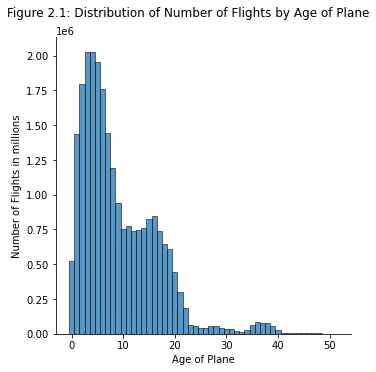

In [152]:
# Plotting a histogram to observe the distribution of number of flights by the age of plane. 
fig = sns.displot(Q2distribution, x = "Age of Plane", discrete = True)

fig.set_axis_labels("Age of Plane", "Number of Flights in millions")
plt.title("Figure 2.1: Distribution of Number of Flights by Age of Plane", x = 0.45, y = 1.05, fontsize = 12)

### Observations from Figure 2.1:
The main age group of the planes range from ages 4 to 7 years old. The highest number of flights are flown by planes in this age group.

The number of flights made by plans under 20 years old is significantly higher than the number of flights made by planes that are more than 20 years old. 

Hence, when doing our analysis it is important to keep in mind not to compare the delay of flights as a net number but to compare it as a ratio of the flights taken by planes in that particular age group.

Futhermore, due to a larger sample size of planes aged below 20, it may lead to differences in the accuracy of conclusion drawm from planes aged above 20 and below 20 years old.

## Step 5:  Plot table of age of the plane against average delay time and overall number of flights that dealt with delays due to the age of the plane

In [180]:
## Querying the age of the plane against the variables that we are using the identify as delays
Q2planeageagainstvariables = c.execute("""
                    SELECT (ontime.Year - planes.year), AVG(ArrDelay), AVG(DepDelay), COUNT(*)
                    FROM ontime JOIN planes ON ontime.TailNum = planes.tailnum
                    WHERE (ontime.Year - planes.year) > -1 AND (ontime.Year - planes.year) < 62
                    GROUP BY (ontime.Year - planes.year)
                    ORDER BY (ontime.Year - planes.year) ASC""").fetchall()

Q2planeageagainstvariables = pd.DataFrame(Q2planeageagainstvariables)

# Renaming columns of the dataframe holding the query result. 
Q2planeageagainstvariables = Q2planeageagainstvariables.rename(columns={0 : "Age of Plane", 1 : "Average ArrDelay in mins", 2 : "Average DepDelay in mins", 3: "Number of Flights"})
Q2planeageagainstvariables

OperationalError: no such table: ontime

In [181]:
# Checking the column names of the Q2planeageagainstvariables DataFrame
print(Q2planeageagainstvariables.columns)

Index(['Age of Plane', 'Delay', 'Average DepDelay in mins',
       'Number of Flights'],
      dtype='object')


In [182]:
Q2planeageagainstvariables.dropna()

,Age of Plane,Delay,Average DepDelay in mins,Number of Flights
0,0,6.912291,8.993650,524242
1,1,6.777440,8.572626,1433163
2,2,6.862580,8.235560,1796499
3,3,7.245769,8.403021,2029101
4,4,7.894389,8.779421,2022290
5,5,7.751199,8.647683,1953299
6,6,7.773016,8.771471,1762241
7,7,8.191440,9.461624,1444182
8,8,8.518550,10.000077,1189825
9,9,8.292629,9.871422,942260


In [183]:
# Plotting a scatter plot of ArrivalDelay against Age of Plane
scatterplot = sns.scatterplot(x="Age of Plane", y="Average ArrDelay in mins", data=Q2planeageagainstvariables, edgecolor=None)

scatterplot.set(xlabel="Plane Age", ylabel="Average Arrival Delay (mins)")
scatterplot.set_title("Figure 2.2.1: Scatterplot of Average Arrival Delay based on Age of Plane", fontsize=11)

plt.tight_layout()

ValueError: Could not interpret value `Average ArrDelay in mins` for parameter `y`

In [ ]:
# Plotting a scatter plot of DepartureDelay against Age of Plane
scatterplot = sns.scatterplot(x="Age of Plane", y="Average DepDelay in mins", data=Q2planeageagainstvariables, edgecolor=None)

scatterplot.set(xlabel="Plane Age", ylabel="Average Departure Delay (mins)")
scatterplot.set_title("Figure 2.2.2: Scatterplot of Average Departure Delay based on Age of Plane", fontsize=11)

plt.tight_layout()

In [ ]:
# Importing the stats module from scipy library
from scipy import stats

# Plotting a scatter plot of ArrivalDelay against Age of Plane with a regression line
regplot = sns.lmplot(x="Age of Plane", y="Average Delay in mins", data=Q2planeageagainstvariables2, ci=None, line_kws={'color': 'red'})

regplot.set(xlabel="Plane Age", ylabel="Average Arrival Delay (mins)")
regplot.fig.suptitle("Figure 2.6: Scatterplot of Average Arrival Delay based on Age of Plane", fontsize=11)

# Getting the slope, intercept and R-squared value of the linear regression
slope, intercept, r_value1, p_value, std_err = stats.linregress(Q2planeageagainstvariables2["Age of Plane"], Q2planeageagainstvariables2["Average Delay in mins"])
r_squared = r_value1 ** 2

# Add the equation and R-squared value to the plot
if regplot.ax.texts: # check if the texts list is not empty
    regplot.ax.texts[0].set_text(f'y = {slope:.2f}x + {intercept:.2f}\nR² = {r_squared:.2f}')

plt.tight_layout()

In [ ]:
print(r_value1)

Small R^2 value of 10.2% suggests that the current model between age and delay in minutes does not have a strong relation. From the plot above, we cannot conclude that the delays is related to the age of the plane. Hence we adjust the age of the planes we are querying 

In [ ]:
Q2adjusted = Q2planeageagainstvariables[:21]
Q2adjusted

In [ ]:
# Renaming the "Average Arrival Delay" column to remove spaces
Q2adjusted = Q2adjusted.rename(columns={"Average ArrDelay in mins": "ArrivalDelay"})

# Plotting a scatter plot of ArrivalDelay against Age of Plane with a regression line
regplot = sns.lmplot(x="Age of Plane", y="ArrivalDelay", data=Q2adjusted, ci=None, line_kws={'color': 'red'})

regplot.set(xlabel="Plane Age", ylabel="Average Arrival Delay (mins)")
regplot.fig.suptitle("Figure 2.4: Scatterplot of Average Arrival Delay based on Age of Plane", fontsize=11)

# Getting the slope, intercept and R-squared value of the linear regression
slope, intercept, r_value2, p_value, std_err = stats.linregress(Q2adjusted["Age of Plane"], Q2adjusted["ArrivalDelay"])
r_squared = r_value2 ** 2

# Add the equation and R-squared value to the plot
if regplot.ax.texts: # check if the texts list is not empty
    regplot.ax.texts[0].set_text(f'y = {slope:.2f}x + {intercept:.2f}\nR² = {r_squared:.2f}')

plt.tight_layout()

In [ ]:
print(r_value2)

Conclusion: the adjusted age of the planes provide a more representative relation between the age of the plane and the average arrival delay in minutes. 

An R square value of 60.9% is not high enough to draw conclusion that older planes lead to more delays, hence further analysis is required

## Step 7: Analysis of delay as combination of the column Arrival Delay and Departure Delay

In [ ]:
## Querying the age of the plane against the variables that we are using the identify as delays
Q2adjustedfortotaldelay = c.execute("""
                    SELECT (ontime.Year - planes.year), AVG(ArrDelay+DepDelay), COUNT(*)
                    FROM ontime JOIN planes ON ontime.TailNum = planes.tailnum
                    WHERE (ontime.Year - planes.year) > -1 AND (ontime.Year - planes.year) < 62
                    GROUP BY (ontime.Year - planes.year)
                    ORDER BY (ontime.Year - planes.year) ASC""").fetchall()

Q2adjustedfortotaldelay = pd.DataFrame(Q2adjustedfortotaldelay)

# Renaming columns of the dataframe holding the query result. 
Q2adjustedfortotaldelay = Q2adjustedfortotaldelay.rename(columns={0 : "Age of Plane", 1 : "Average Delay in mins", 2 :"Number of Flights"})
Q2adjustedfortotaldelay

In [ ]:
# Plotting a scatter plot of ArrivalDelay against Age of Plane with a regression line
regplot = sns.lmplot(x="Age of Plane", y="Average Delay in mins", data=Q2adjustedfortotaldelay, ci=None, line_kws={'color': 'red'})

regplot.set(xlabel="Plane Age", ylabel="Average Arrival Delay (mins)")
regplot.fig.suptitle("Figure 2.5: Scatterplot of Average Arrival Delay based on Age of Plane", fontsize=11)

# Getting the slope, intercept and R-squared value of the linear regression
slope, intercept, r_value3, p_value, std_err = stats.linregress(Q2adjustedfortotaldelay["Age of Plane"], Q2adjustedfortotaldelay["Average Delay in mins"])
r_squared = r_value3 ** 2

# Add the equation and R-squared value to the plot
if regplot.ax.texts: # check if the texts list is not empty
    regplot.ax.texts[0].set_text(f'y = {slope:.2f}x + {intercept:.2f}\nR² = {r_squared:.2f}')

plt.tight_layout()

In [ ]:
print(r_value3)

In [ ]:
# Query for adjusted plane age
Q2adjustedfortotaldelay2 = Q2adjustedfortotaldelay[:21]
print(Q2adjustedfortotaldelay2)

In [ ]:
# Plotting a scatter plot of ArrivalDelay against Age of Plane with a regression line
regplot = sns.lmplot(x="Age of Plane", y="Average Delay in mins", data=Q2adjustedfortotaldelay2, ci=None, line_kws={'color': 'red'})

regplot.set(xlabel="Plane Age", ylabel="Average Arrival Delay (mins)")
regplot.fig.suptitle("Figure 2.6: Scatterplot of Average Arrival Delay based on Age of Plane (Adjusted)", fontsize=11)

# Getting the slope, intercept and R-squared value of the linear regression
slope, intercept, r_value4, p_value, std_err = stats.linregress(Q2adjustedfortotaldelay2["Age of Plane"], Q2adjustedfortotaldelay2["Average Delay in mins"])
r_squared = r_value4 ** 2

# Add the equation and R-squared value to the plot
if regplot.ax.texts: # check if the texts list is not empty
    regplot.ax.texts[0].set_text(f'y = {slope:.2f}x + {intercept:.2f}\nR² = {r_squared:.2f}')

plt.tight_layout()

In [ ]:
print(r_value4)

## Step 8: Querying delays as percentage of the total number of flight taken by plane according to the age of the plane

In [2]:
# Querying for plane age by 
# Average arrival delay in minutes 
# Total number of flights (using count)
# Number of flights delayed
# Percentage of delayed flights
Q2planeageagainstpercentagedelay = c.execute("""
                                                SELECT (ontime.Year - planes.year), (AVG(ArrDelay+DepDelay)), COUNT(*), SUM(CASE WHEN ArrDelay > 0 and DepDelay > 0 THEN 1 ELSE 0 END), ((CAST(SUM(CASE WHEN ArrDelay > 0 and DepDelay > 0 THEN 1 ELSE 0 END) AS FLOAT)/CAST(COUNT(*) AS FLOAT))*100)
                                                FROM ontime JOIN planes ON ontime.TailNum = planes.tailnum
                                                WHERE (ontime.Year - planes.year) > -1 AND (ontime.Year - planes.year) < 62
                                                GROUP BY (ontime.Year - planes.year)
                                                ORDER BY (ontime.Year - planes.year) ASC""").fetchall()

NameError: name 'c' is not defined

In [177]:
Q2planeageagainstpercentagedelay = pd.DataFrame(Q2planeageagainstpercentagedelay)
# Renaming columns of the dataframe holding the query result. 
Q2planeageagainstpercentagedelay = Q2planeageagainstpercentagedelay.rename(columns={0 : "Age of Plane", 1 : "Average Arrival Delay in mins", 2 : "Total Number of Flights", 3 : "Number of Flights Delayed", 4 : "% Delayed Flights"})
Q2planeageagainstpercentagedelay

,Age of Plane,Average Arrival Delay in mins,Total Number of Flights,Number of Flights Delayed,% Delayed Flights
0,0,15.885640,524242,150672,28.740925
1,1,15.329619,1433163,399225,27.856217
2,2,15.078235,1796499,496537,27.639147
3,3,15.624807,2029101,566966,27.941734
4,4,16.649327,2022290,577518,28.557625
5,5,16.375056,1953299,556451,28.487753
6,6,16.514970,1762241,510155,28.949219
7,7,17.622996,1444182,431299,29.864588
8,8,18.482910,1189825,363004,30.509024
9,9,18.124932,942260,282526,29.983869


In [178]:
Q2planeageagainstpercentagedelay2 = Q2planeageagainstpercentagedelay[:21]
print(Q2planeageagainstpercentagedelay2)

    Age of Plane  Average Arrival Delay in mins  Total Number of Flights  \
0              0                      15.885640                   524242   
1              1                      15.329619                  1433163   
2              2                      15.078235                  1796499   
3              3                      15.624807                  2029101   
4              4                      16.649327                  2022290   
5              5                      16.375056                  1953299   
6              6                      16.514970                  1762241   
7              7                      17.622996                  1444182   
8              8                      18.482910                  1189825   
9              9                      18.124932                   942260   
10            10                      17.478335                   750815   
11            11                      15.558593                   774792   
12          

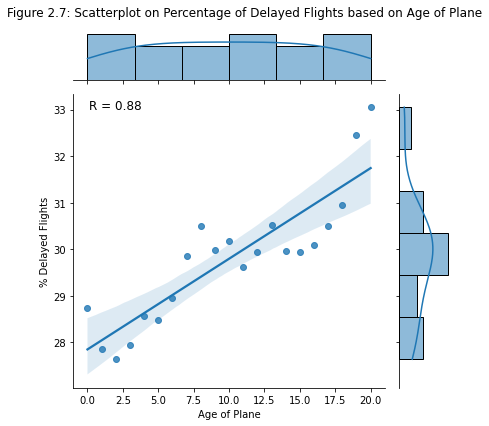

In [179]:
# Create jointplot with regression line
scatterplot = sns.jointplot(x = "Age of Plane", y = "% Delayed Flights", data = Q2planeageagainstpercentagedelay2, kind = "reg", )

scatterplot.fig.suptitle("Figure 2.5: Scatterplot on Percentage of Delayed Flights based on Age of Plane")

# Get the R value from the regression plot
r_value = stats.pearsonr(
    Q2planeageagainstpercentagedelay2["Age of Plane"],
    Q2planeageagainstpercentagedelay2["% Delayed Flights"]
)[0]

# Add the R value to the plot
scatterplot.ax_joint.annotate(
    f"R = {r_value:.2f}",
    xy=(0.05, 0.95),
    xycoords="axes fraction",
    fontsize=12
)

# Add plot title and adjust layout
scatterplot.fig.suptitle("Figure 2.7: Scatterplot on Percentage of Delayed Flights based on Age of Plane", fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

In this code, we use the stats.pearsonr() function to calculate the correlation coefficient (R value) between the Age of Plane and % Delayed Flights columns in the Q2planeageagainstpercentagedelay2 dataframe. The function returns a tuple containing the correlation coefficient and the corresponding p-value, so we extract the correlation coefficient (which is the first element of the tuple) and store it in the r_value variable.

We then use the annotate() method to add the R value to the plot. The xy parameter specifies the position of the text, and the xycoords parameter specifies that the position is in the coordinate system of the plot axes. The fontsize parameter sets the size of the text.

## Answer 2: 
Using the pearson's function to calculate the correlation coefficient (R-Value) between plane age and percentage of delayed flights. 

The R value of 0.88 suggest strong correlation between the age of the plane and the total percentage of delayed flights. Hence we can conclude from the table that older planes lead to more delays.

# ------------------------------------------------------

# 3: How does the number of people flying between different locations change over time?
1. Query Step : Analysis of top 5 most air traffic between airports over time
2. Query Step : Analysis of top 5 Cities with with the most air traffic over time 
3. Conclusion Step : Comparing top 5 cities and their airtraffic over months and years

In [23]:
# Finding the top 5 most travelled flight path (from one airport to another)
Q3airport = c.execute("""
                        SELECT ontime.Origin || ' to ' || ontime.Dest AS Route, 
                                COUNT(*) AS TotalFlights
                        FROM ontime 
                        JOIN airports 
                        ON ontime.Dest = airports.iata
                        WHERE Cancelled = 0 AND Diverted = 0
                        GROUP BY ontime.Origin, ontime.Dest
                        ORDER BY COUNT(*) DESC
                        """)

# Printing origin to destination and net traffic (top 5)
Q3airport = pd.DataFrame(Q3airport)
Q3airport = Q3airport.rename(columns={0 : "Route", 1 : "Net Traffic"})
Q3airport

,Route,Net Traffic
0,LAX to SAN,15248
1,SAN to LAX,15225
2,BOS to LGA,12096
3,LGA to BOS,11990
4,MSP to ORD,11882
...,...,...
4315,VPS to SAT,1
4316,VPS to XNA,1
4317,XNA to CHA,1
4318,XNA to ICT,1


In [24]:
Q3top5routes = Q3airport[:5]
Q3top5routes

,Route,Net Traffic
0,LAX to SAN,15248
1,SAN to LAX,15225
2,BOS to LGA,12096
3,LGA to BOS,11990
4,MSP to ORD,11882


From the data table, we have observed that the top 5 travel routes from 2003-2007 is:

1. LAX to SAN	Net Traffic: 71479
2. SAN to LAX	Net Traffic: 71337
3. LAX to LAS	Net Traffic: 63339
4. LAS to LAX	Net Traffic: 62259
5. BOS to LGA	Net Traffic: 60811

Upon understanding the Top 5 travelled routes, we must understand the change in the air traffic of the routes over time. 

### Querying individual routes according to: 
- Total flights over time (observe overall trend)
- Total flights in years over months (observe differece in trend between years)

In [30]:
Q3LAXtoSAN = c.execute("""
                        SELECT ontime.Year,
                               ontime.Month, 
                               ontime.Origin || ' to ' || ontime.Dest AS Route, 
                               COUNT(*) AS TotalFlights
                        FROM ontime 
                        JOIN airports 
                        ON ontime.Dest = airports.iata
                        WHERE Cancelled = 0 
                        AND Diverted = 0 
                        AND Route = 'LAX to SAN'
                        GROUP BY ontime.Year, ontime.Month, Route
                        ORDER BY ontime.Year
                        """)

Q3LAXtoSAN = pd.DataFrame(Q3LAXtoSAN)
Q3LAXtoSAN = Q3LAXtoSAN.rename(columns={0: "Year", 1: "Month", 2: "Route", 3:"Net Traffic"})
Q3LAXtoSAN

,Year,Month,Route,Net Traffic
0,2003,1,LAX to SAN,2880
1,2003,2,LAX to SAN,2624
2,2003,3,LAX to SAN,2892
3,2003,4,LAX to SAN,2506
4,2003,5,LAX to SAN,2500
5,2003,6,LAX to SAN,2438
6,2003,7,LAX to SAN,2494
7,2003,8,LAX to SAN,2492
8,2003,9,LAX to SAN,2424
9,2003,10,LAX to SAN,2372


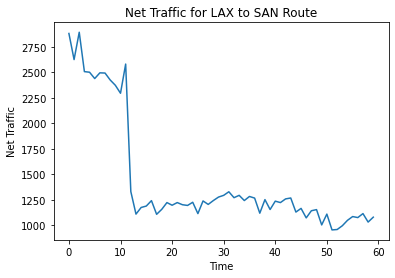

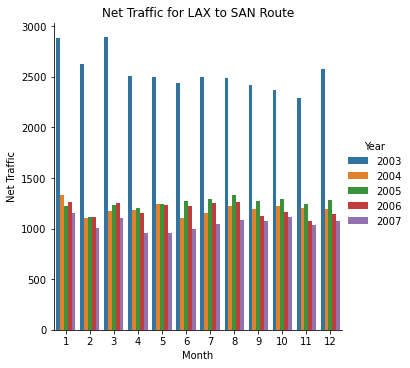

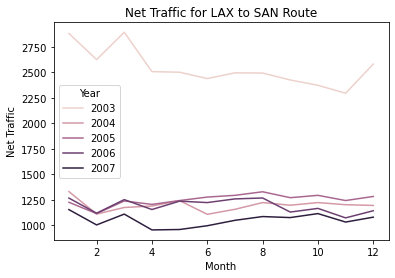

In [31]:
# Q3.1 LAX TO SAN
# Importing plotting package
import matplotlib.pyplot as plt

# PLOTTING NET TRAFFIC BY YEAR
# use matplot lib to find the route of the plane
x = Q3LAXtoSAN.index 
y = Q3LAXtoSAN["Net Traffic"]

plt.plot(x, y)
plt.xlabel("Time")
plt.ylabel("Net Traffic")
plt.title("Net Traffic for LAX to SAN Route")
plt.show()

#PLOTTING NET TRAFFIC BY MONTH
import seaborn as sns

# BARPLOT
sns.catplot(x="Month", y="Net Traffic", hue="Year", kind="bar", data=Q3LAXtoSAN)
plt.xlabel("Month")
plt.ylabel("Net Traffic")
plt.title("Net Traffic for LAX to SAN Route")
plt.show()

# LINEPLOT
sns.lineplot(x="Month", y="Net Traffic", hue="Year", data=Q3LAXtoSAN)
plt.xlabel("Month")
plt.ylabel("Net Traffic")
plt.title("Net Traffic for LAX to SAN Route")
plt.show()

In [ ]:
# SAN to LAX
Q3SANtoLAX = c.execute("""
                        SELECT ontime.Year,
                               ontime.Month, 
                               ontime.Origin || ' to ' || ontime.Dest AS Route, 
                               COUNT(*) AS TotalFlights
                        FROM ontime 
                        JOIN airports 
                        ON ontime.Dest = airports.iata
                        WHERE Cancelled = 0 
                        AND Diverted = 0 
                        AND Route = 'SAN to LAX'
                        GROUP BY ontime.Year, ontime.Month, Route
                        ORDER BY ontime.Year
                        """)

Q3SANtoLAX = pd.DataFrame(Q3SANtoLAX)
Q3SANtoLAX = Q3SANtoLAX.rename(columns={0: "Year", 1: "Month", 2: "Route", 3:"Net Traffic"})
Q3SANtoLAX

# Convert Month column to datetime and set as index
Q3SANtoLAX['Date'] = pd.to_datetime(Q3SANtoLAX[['Year', 'Month']].assign(DAY=1))
Q3SANtoLAX = Q3SANtoLAX.set_index('Date')

# Use matplot lib to find the route of the plane over 5 years by year
x = Q3SANtoLAX.index 
y = Q3SANtoLAX["Net Traffic"]

plt.plot(x, y)
plt.xlabel("Year")
plt.ylabel("Net Traffic")
plt.title("Net Traffic for SAN to LAX Route")
plt.show()

# assuming seaborn to view the difference in net traffic each year by month
sns.lineplot(x="Month", y="Net Traffic", hue="Year", data=Q3SANtoLAX)
plt.xlabel("Month")
plt.ylabel("Net Traffic")
plt.title("Net Traffic for SAN to LAX Route")
plt.show()

In [ ]:
# LAX to LAS
Q3LAXtoLAS = c.execute("""
                        SELECT ontime.Year,
                               ontime.Month, 
                               ontime.Origin || ' to ' || ontime.Dest AS Route, 
                               COUNT(*) AS TotalFlights
                        FROM ontime 
                        JOIN airports 
                        ON ontime.Dest = airports.iata
                        WHERE Cancelled = 0 
                        AND Diverted = 0 
                        AND Route = 'LAX to LAS'
                        GROUP BY ontime.Year, ontime.Month, Route
                        ORDER BY ontime.Year
                        """)

Q3LAXtoLAS = pd.DataFrame(Q3LAXtoLAS)
Q3LAXtoLAS = Q3LAXtoLAS.rename(columns={0: "Year", 1: "Month", 2: "Route", 3:"Net Traffic"})
Q3LAXtoLAS

# Convert Month column to datetime and set as index
Q3LAXtoLAS['Date'] = pd.to_datetime(Q3LAXtoLAS[['Year', 'Month']].assign(DAY=1))
Q3LAXtoLAS = Q3LAXtoLAS.set_index('Date')

# use matplot lib to find the route of the plane over 5 years by year
x = Q3LAXtoLAS.index 
y = Q3LAXtoLAS["Net Traffic"]

plt.plot(x, y)
plt.xlabel("Time")
plt.ylabel("Net Traffic")
plt.title("Net Traffic for LAX to LAS Route")
plt.show()

# assuming seaborn to view the difference in net traffic each year by month
sns.lineplot(x="Month", y="Net Traffic", hue="Year", data=Q3LAXtoLAS)
plt.xlabel("Month")
plt.ylabel("Net Traffic")
plt.title("Net Traffic for LAX to LAS Route")
plt.show()

In [ ]:
# LAS to LAX 
Q3LAStoLAX = c.execute("""
                        SELECT ontime.Year,
                               ontime.Month, 
                               ontime.Origin || ' to ' || ontime.Dest AS Route, 
                               COUNT(*) AS TotalFlights
                        FROM ontime 
                        JOIN airports 
                        ON ontime.Dest = airports.iata
                        WHERE Cancelled = 0 
                        AND Diverted = 0 
                        AND Route = 'LAS to LAX'
                        GROUP BY ontime.Year, ontime.Month, Route
                        ORDER BY ontime.Year
                        """)

Q3LAStoLAX = pd.DataFrame(Q3LAStoLAX)
Q3LAStoLAX = Q3LAStoLAX.rename(columns={0: "Year", 1: "Month", 2: "Route", 3:"Net Traffic"})
Q3LAStoLAX

# Convert Month column to datetime and set as index
Q3LAStoLAX['Date'] = pd.to_datetime(Q3LAStoLAX[['Year', 'Month']].assign(DAY=1))
Q3LAStoLAX = Q3LAStoLAX.set_index('Date')

# use matplot lib to find the route of the plane over 5 years by year
x = Q3LAStoLAX.index 
y = Q3LAStoLAX["Net Traffic"]

plt.plot(x, y)
plt.xlabel("Time")
plt.ylabel("Net Traffic")
plt.title("Net Traffic for LAX to LAS Route")
plt.show()

# assuming seaborn to view the difference in net traffic each year by month
sns.lineplot(x="Month", y="Net Traffic", hue="Year", data=Q3LAStoLAX)
plt.xlabel("Month")
plt.ylabel("Net Traffic")
plt.title("Net Traffic for LAX to LAS Route")
plt.show()

Top 4 routes make up the to and from for LAX -> LAS and SAN -> LAX their results are similiar, hence further analysis will only consider 3 routes 
- LAX LAS
- SAN LAX
- BOS LGA

In [ ]:
# BOS to LGA
Q3BOStoLGA = c.execute("""
                        SELECT ontime.Year,
                               ontime.Month, 
                               ontime.Origin || ' to ' || ontime.Dest AS Route, 
                               COUNT(*) AS TotalFlights
                        FROM ontime 
                        JOIN airports 
                        ON ontime.Dest = airports.iata
                        WHERE Cancelled = 0 
                        AND Diverted = 0 
                        AND Route = 'BOS to LGA'
                        GROUP BY ontime.Year, ontime.Month, Route
                        ORDER BY ontime.Year
                        """)

Q3BOStoLGA = pd.DataFrame(Q3BOStoLGA)
Q3BOStoLGA = Q3BOStoLGA.rename(columns={0: "Year", 1: "Month", 2: "Route", 3:"Net Traffic"})
Q3BOStoLGA

# Convert Month column to datetime and set as index
Q3BOStoLGA['Date'] = pd.to_datetime(Q3BOStoLGA[['Year', 'Month']].assign(DAY=1))
Q3BOStoLGA = Q3BOStoLGA.set_index('Date')

# Use matplot lib to find the route of the plane over 5 years by year
x = Q3BOStoLGA.index 
y = Q3BOStoLGA["Net Traffic"]

plt.plot(x, y)
plt.xlabel("Time")
plt.ylabel("Net Traffic")
plt.title("Net Traffic for BOS to LGA Route")
plt.show()

# assuming seaborn to view the difference in net traffic each year by month
sns.lineplot(x="Month", y="Net Traffic", hue="Year", data=Q3BOStoLGA)
plt.xlabel("Month")
plt.ylabel("Net Traffic")
plt.title("Net Traffic for BOS to LGA Route")
plt.show()

### Querying top 3 routes by month 
To analyse the difference in month trend accross 3 different routes

In [ ]:
Q3Top3ByMonth = c.execute("""
                        SELECT 
                        ontime.Year,
                        ontime.Month, 
                        ontime.Origin || ' to ' || ontime.Dest AS Route, 
                        COUNT(*) AS TotalFlights
                        FROM ontime 
                        JOIN airports 
                        ON ontime.Dest = airports.iata
                        WHERE Cancelled = 0 
                        AND Diverted = 0
                        AND (Route = 'BOS to LGA'
                        OR Route = 'LAX to LAS'
                        OR Route = 'LAX to SAN')
                        GROUP BY ontime.Year, ontime.Month, Route
                        ORDER BY ontime.Year, ontime.Month
                        """)

Q3Top3ByMonth = pd.DataFrame(Q3Top3ByMonth)
Q3Top3ByMonth = Q3Top3ByMonth.rename(columns={0: "Year", 1: "Month", 2: "Route", 3:"Net Traffic"})
Q3Top3ByMonth

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# assuming Q3Top3ByMonth is already loaded with the data
sns.lineplot(x="Month", y="Net Traffic", hue="Route", data=Q3Top3ByMonth)
plt.xlabel("Month")
plt.ylabel("Net Traffic")
plt.title("Net Traffic for Top 3 Routes against Month")
plt.show()

### Querying top 3 routes by Year

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick #importing package to help us remove the decimall in the year label

Q3Top3ByMonth["Year"] = Q3Top3ByMonth["Year"].astype(int) #to prevent the year column from showing decimals 
ax = sns.lineplot(x="Year", y="Net Traffic", hue="Route", data=Q3Top3ByMonth)
ax.set(xlabel='Year', ylabel='Net Traffic', title='Net Traffic for Top 3 Routes from 2003-2007')
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
plt.show(### Conclusion: 
The overall trend in traffic volume differs from route to route, but a common trend is that there will be a dip in the net traffic at the beggining and end of each year. With the net traffic changing over the course of the year.

The overall traffic volume for different routes also differs from route to route. However it is clear that the net traffic changes over time.

## Answer 3: 
The overall trend in traffic volume differs from route to route, but a common trend is that there will be a dip in the net traffic at the beggining and end of each year. With the net traffic changing over the course of the year.

The overall traffic volume for different routes also differs from route to route. However it is clear that the net traffic changes over time.

# ------------------------------------------------------

#  Q4: Can you detect cascading failures as delays in one airport create delays in others?

### Variables to consider querying: 

1. Arrival Delay of planes that have consequtive flights and result in the Departure Delay of consecutive flights.
- Identify planes that have Arrival Delay at their destination.
- Check if the plane has departed late form the destination airport to verify if there are cascading failures
- If the departure delay from the destination airport > arrival delay at the same destination airport, we can also verify that delays are increasing as the plane travels from one location to other locations consecutively

2. Arrival Delay of planes that cause Departure Delay of other flights
- Identify flights with Arrival Delay and arrived late. 
- Identify planes that are scheduled to depart from the same airport within a certain timeframe from which the Arrival Delayed flight has arrived
- Verify if those identified planes also depart late, which could be attributed to the plane which arrived late 
- Further more, we check if these Departure Delayed flights results in more flights departing late

## Step 1: Identitfying arrival delay of airplanes that cause other subsequent flight of that plane to be delayed

 Lateaircraftdelay max -> plane is rescheduled to the next day
 
 Lateaircraftdelay (< 250 MINS) -> no link
 
 Lateaircraftdelay (< 100 MINS) -> conclude that we can detect cascading failures due to delays in one airport

## Step 1.1: Late aircraft delay max

In [ ]:
# Querying flights that have experienced "LateAircraftDelay" (MAX)
q4_lateaircraftdelay_MAX = c.execute("""
                                    SELECT Year, Month, DayofMonth, DepTime, CRSDepTime, ArrTime, CRSArrTime, TailNum, ArrDelay,
                                    DepDelay, Origin, Dest, FlightNum, LateAircraftDelay
                                    FROM ontime
                                    WHERE Cancelled = 0 AND Diverted = 0 AND LateAircraftDelay > 0
                                    AND TailNum != 0
                                    ORDER BY LateAircraftDelay DESC""")
q4_lateaircraftdelay_MAX = pd.DataFrame(q4_lateaircraftdelay_MAX)
q4_lateaircraftdelay_MAX = q4_lateaircraftdelay_MAX.rename(columns = {0: "Year", 1: "Month", 2: "DayofMonth", 3: "DepTime", 
                                                              4: "CRSDepTime", 5: "ArrTime", 6: "CRSArrTime", 7: "TailNum", 
                                                              8: "ArrDelay", 9: "DepDelay", 10: "Origin", 11: "Dest", 
                                                              12: "Flight Number", 13: "LateAircraftDelay"})
q4_lateaircraftdelay_MAX## Step 4.1: Late aircraft delay max

In [ ]:
# Querying for row 1: 26/11/2006 Tail Number: N652UA with LateAirCraftDelay of 1366
q4_N652UA = c.execute('''
                         SELECT Year, Month, DayofMonth, DepTime, CRSDepTime, ArrTime, CRSArrTime, TailNum, ArrDelay,
                         DepDelay, Origin, Dest, LateAircraftDelay
                         FROM ontime
                         WHERE Year = 2006 AND Month = 11 AND DayofMonth = 26 AND TailNum = 'N652UA'
                         ORDER BY CRSDepTime''')
q4_N652UA = pd.DataFrame(q4_N652UA)
q4_N652UA = q4_N652UA.rename(columns = {0: "Year", 1: "Month", 2: "DayofMonth", 3: "DepTime", 4: "CRSDepTime", 5: "ArrTime", 
                                        6: "CRSArrTime", 7: "TailNum", 8: "ArrDelay", 9: "DepDelay", 10: "Origin", 11: "Dest", 
                                        12: "LateAircraftDelay"})
q4_N652UA

## Step 1.2: LateAirCraftDelay < 250 mins 

In [ ]:
# Querying flights that have experienced "LateAircraftDelay" (LateAircraftDelay < 250mins)
q4_lateaircraftdelay_250 = c.execute("""
                                    SELECT Year, Month, DayofMonth, DepTime, CRSDepTime, ArrTime, CRSArrTime, TailNum, ArrDelay,
                                    DepDelay, Origin, Dest, FlightNum, LateAircraftDelay
                                    FROM ontime
                                    WHERE Cancelled = 0 AND Diverted = 0 AND LateAircraftDelay > 0 AND LateAircraftDelay < 250
                                    AND TailNum != 0
                                    ORDER BY LateAircraftDelay DESC""")
q4_lateaircraftdelay_250 = pd.DataFrame(q4_lateaircraftdelay_250)
q4_lateaircraftdelay_250 = q4_lateaircraftdelay_250.rename(columns = {0: "Year", 1: "Month", 2: "DayofMonth", 3: "DepTime", 
                                                              4: "CRSDepTime", 5: "ArrTime", 6: "CRSArrTime", 7: "TailNum", 
                                                              8: "ArrDelay", 9: "DepDelay", 10: "Origin", 11: "Dest", 
                                                              12: "Flight Number", 13: "LateAircraftDelay"})
q4_lateaircraftdelay_250

In [ ]:
# Querying for R0 : 26/01/2004 Tail Number: N471UA with LateAirCraftDelay of 1366
q4_N471UA = c.execute('''
                         SELECT Year, Month, DayofMonth, DepTime, CRSDepTime, ArrTime, CRSArrTime, TailNum, ArrDelay,
                         DepDelay, Origin, Dest, LateAircraftDelay
                         FROM ontime
                         WHERE Year = 2004 AND Month = 1 AND DayofMonth = 26 AND TailNum = 'N471UA'
                         ORDER BY CRSDepTime''')
q4_N471UA = pd.DataFrame(q4_N471UA)
q4_N471UA = q4_N471UA.rename(columns = {0: "Year", 1: "Month", 2: "DayofMonth", 3: "DepTime", 4: "CRSDepTime", 5: "ArrTime", 
                                        6: "CRSArrTime", 7: "TailNum", 8: "ArrDelay", 9: "DepDelay", 10: "Origin", 11: "Dest", 
                                        12: "LateAircraftDelay"})
q4_N471UA

In [ ]:
# Querying for R1 : 18/04/2004 Tail Number: N634BR with LateAirCraftDelay of 1366
q4_N634BR = c.execute('''
                         SELECT Year, Month, DayofMonth, DepTime, CRSDepTime, ArrTime, CRSArrTime, TailNum, ArrDelay,
                         DepDelay, Origin, Dest, LateAircraftDelay
                         FROM ontime
                         WHERE Year = 2004 AND Month = 4 AND DayofMonth = 18 AND TailNum = 'N634BR'
                         ORDER BY CRSDepTime''')
q4_N634BR = pd.DataFrame(q4_N634BR)
q4_N634BR = q4_N634BR.rename(columns = {0: "Year", 1: "Month", 2: "DayofMonth", 3: "DepTime", 4: "CRSDepTime", 5: "ArrTime", 
                                        6: "CRSArrTime", 7: "TailNum", 8: "ArrDelay", 9: "DepDelay", 10: "Origin", 11: "Dest", 
                                        12: "LateAircraftDelay"})
q4_N634BR

## Step 1.3: LateAirCraftDelay < 100 mins

In [ ]:
# Querying flights that have experienced "LateAircraftDelay < 100mins" 
q4_lateaircraftdelay_100 = c.execute("""
                                    SELECT Year, Month, DayofMonth, DepTime, CRSDepTime, ArrTime, CRSArrTime, TailNum, ArrDelay,
                                    DepDelay, Origin, Dest, FlightNum, LateAircraftDelay
                                    FROM ontime
                                    WHERE Cancelled = 0 AND Diverted = 0 AND LateAircraftDelay > 0 AND LateAircraftDelay < 100 
                                    AND TailNum != 0
                                    ORDER BY LateAircraftDelay DESC""")
q4_lateaircraftdelay_100 = pd.DataFrame(q4_lateaircraftdelay_100)
q4_lateaircraftdelay_100 = q4_lateaircraftdelay_100.rename(columns = {0: "Year", 1: "Month", 2: "DayofMonth", 3: "DepTime", 
                                                              4: "CRSDepTime", 5: "ArrTime", 6: "CRSArrTime", 7: "TailNum", 
                                                              8: "ArrDelay", 9: "DepDelay", 10: "Origin", 11: "Dest", 
                                           ,                   12: "Flight Number", 13: "LateAircraftDelay"})
q4_lateaircraftdelay_100

In [ ]:
### N464UA analysing flight with the tail number N464UA on 23/01/2004
q4_N464UA = c.execute("""
                         SELECT Year, Month, DayofMonth, DepTime, CRSDepTime, ArrTime, CRSArrTime, TailNum, ArrDelay,
                         DepDelay, Origin, Dest, LateAircraftDelay
                         FROM ontime
                         WHERE Year = 2004 AND Month = 1 AND DayofMonth = 23 AND TailNum = 'N464UA'
                         ORDER BY CRSDepTime""")
q4_N464UA = pd.DataFrame(q4_N464UA)
q4_N464UA = q4_N464UA.rename(columns = {0: "Year", 1: "Month", 2: "DayofMonth", 3: "DepTime", 4: "CRSDepTime", 5: "ArrTime", 
                                        6: "CRSArrTime", 7: "TailNum", 8: "ArrDelay", 9: "DepDelay", 10: "Origin", 11: "Dest", 
                                        12: "LateAircraftDelay"})
q4_N464UA

In [ ]:
### N331UA analysing flight with the tail number N907UA on 03/01/2004
q4_N331UA = c.execute("""
                         SELECT Year, Month, DayofMonth, DepTime, CRSDepTime, ArrTime, CRSArrTime, TailNum, ArrDelay,
                         DepDelay, Origin, Dest, LateAircraftDelay
                         FROM ontime
                         WHERE Year = 2004 AND Month = 1 AND DayofMonth = 3 AND TailNum = 'N331UA'
                         ORDER BY CRSDepTime""")
q4_N331UA = pd.DataFrame(q4_N331UA)
q4_N331UA = q4_N331UA.rename(columns = {0: "Year", 1: "Month", 2: "DayofMonth", 3: "DepTime", 4: "CRSDepTime", 5: "ArrTime", 
                                        6: "CRSArrTime", 7: "TailNum", 8: "ArrDelay", 9: "DepDelay", 10: "Origin", 11: "Dest", 
                                        12: "LateAircraftDelay"})
q4_N331UA

In [ ]:
# Quering information regarding flight N165UW  on 03/01/2004
q4_N165UW = c.execute("""
                         SELECT Year, Month, DayofMonth, DepTime, CRSDepTime, ArrTime, CRSArrTime, TailNum, ArrDelay,
                         DepDelay, Origin, Dest, LateAircraftDelay
                         FROM ontime
                         WHERE Year = 2006 AND Month = 1 AND DayofMonth = 13 AND TailNum = 'N165UW'
                         ORDER BY CRSDepTime""")
q4_N165UW = pd.DataFrame(q4_N165UW)
q4_N165UW = q4_N165UW.rename(columns = {0: "Year", 1: "Month", 2: "DayofMonth", 3: "DepTime", 4: "CRSDepTime", 5: "ArrTime", 
                                        6: "CRSArrTime", 7: "TailNum", 8: "ArrDelay", 9: "DepDelay", 10: "Origin", 11: "Dest", 
                                        12: "LateAircraftDelay"})
q4_N165UW

Conclusion: Cascading delays can be expected in planes with delays in arrival and depature timings. This is especially evident for planes with aircraft delay timings of less than 100 mins

## Step 2: analysis of airports with delays compared to flights with delays

In [ ]:
# Querying flights that have experienced "LateAircraftDelay < 100mins? for ORD Airport 
# Quering information regarding flight N165UW  on 03/01/2004
q4_ORD = c.execute("""
                         SELECT Year, Month, DayofMonth, DepTime, CRSDepTime, ArrTime, CRSArrTime, TailNum, ArrDelay,
                         DepDelay, Origin, Dest, LateAircraftDelay
                         FROM ontime
                         WHERE Year = 2006 AND Month = 1 AND DayofMonth = 13 AND Origin = 'ORD'
                         ORDER BY CRSDepTime""")
q4_ORD = pd.DataFrame(q4_ORD)
q4_ORD = q4_ORD.rename(columns = {0: "Year", 1: "Month", 2: "DayofMonth", 3: "DepTime", 4: "CRSDepTime", 5: "ArrTime", 
                                        6: "CRSArrTime", 7: "TailNum", 8: "ArrDelay", 9: "DepDelay", 10: "Origin", 11: "Dest", 
                                        12: "LateAircraftDelay"})
q4_ORD

In [ ]:
import pandas as pd

# drop any rows that have missing values in either the ArrDelay or DepDelay column
q4_ORD = q4_ORD.dropna(subset=['ArrDelay', 'DepDelay'])

# select only the ArrDelay and DepDelay columns
arr_delay = q4_ORD['ArrDelay']
dep_delay = q4_ORD['DepDelay']

# calculate the correlation
correlation = arr_delay.corr(dep_delay)

# print the correlation
print(correlation)

In [ ]:
## Plot Deptime to Lateaircraftdelay 
import matplotlib.pyplot as plt

# Filter the data for the flights that have experienced "LateAircraftDelay < 100mins"
q4_ORD_filtered = q4_ORD[q4_ORD['LateAircraftDelay'] < 100]

# Create a scatter plot of departure time vs departure delay time
plt.scatter(q4_ORD_filtered['DepTime'], q4_ORD_filtered['DepDelay'])

# Add labels and title to the plot
plt.xlabel('Departure Time')
plt.ylabel('Departure Delay Time')
plt.title('Departure Time vs Departure Delay Time for Flights from ORD on January 13, 2006')

# Show the plot
plt.show()

Notice from the plot that departures start to increase from the 1200 hour 

In [ ]:
# 1200 to 1300 
# Filter the data for the flights with scheduled departure time between 12:00 PM and 1:00 PM
q4_filtered = q4_ORD_filtered[(q4_ORD_filtered['CRSDepTime'] >= 1200) & (q4_ORD_filtered['CRSDepTime'] < 1300)]

# Create a scatter plot of departure delay vs arrival delay for the filtered data
plt.scatter(q4_filtered['DepDelay'], q4_filtered['ArrDelay'])

# Add labels and title to the plot
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.title('Arrival Delay vs Departure Delay for Flights Scheduled from 12:00 PM to 1:00 PM')

# Show the plot
plt.show()

# 1300 to 1400 
# Filter the data for the flights with scheduled departure time between 1:00 PM to 2:00 PM
q4_filtered = q4_ORD_filtered[(q4_ORD_filtered['CRSDepTime'] >= 1300) & (q4_ORD_filtered['CRSDepTime'] < 1400)]

# Create a scatter plot of departure delay vs arrival delay for the filtered data
plt.scatter(q4_filtered['DepDelay'], q4_filtered['ArrDelay'])

# Add labels and title to the plot
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.title('Arrival Delay vs Departure Delay for Flights Scheduled from 1:00 PM to 2:00 PM')

# Show the plot
plt.show()

# 1400 to 1500 
# Filter the data for the flights with scheduled departure time between  2:00 PM to 3:00 PM
q4_filtered = q4_ORD_filtered[(q4_ORD_filtered['CRSDepTime'] >= 1400) & (q4_ORD_filtered['CRSDepTime'] < 1500)]
3
# Create a scatter plot of departure delay vs arrival delay for the filtered data
plt.scatter(q4_filtered['DepDelay'], q4_filtered['ArrDelay'])

# Add labels and title to the plot
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.title('Arrival Delay vs Departure Delay for Flights Scheduled from 2:00 PM to 3:00 PM')

# Show the plot
plt.show()

### Findings from the table above: 

Based on the analysis by flight number and analysis by airports arrival and depature timings, it can be seen that arrival delay in one plane causes cascading failures in the subsequent flight of that plane. 

Furthermore, we can analyse if failure in one airport will lead to failure in another, by considering the same arrival and delay times of the various airports.

## Step 2.2: Analysis of flights with arrival delays after departing late from ORD

In [ ]:
## From rows 1015, 1016, 1017, 
# ORD -> BOS 
# ORD -> MSN 
# ORD -> LAS
# Within the hourof 2200 on 13/01/2006

In [ ]:
# Importing packages for plotting and correlation analysis
from numpy import mean
from numpy import std
from matplotlib import pyplot
import numpy as np
%matplotlib inline

In [ ]:
# Filtering the DepDelay and ArrDelay arriving and and departing from ORD airport
DepdelayORD = q4_ORD["DepDelay"]
ArrdelayORD = q4_ORD["ArrDelay"]

# Importing the desitnation of arrival after departing from ORD airport late
Dest_BOS = q4_ORD[q4_ORD['Dest'] == "BOS"]
Dest_MSN = q4_ORD[q4_ORD['Dest'] == "MSN"]
Dest_LAS = q4_ORD[q4_ORD['Dest'] == "LAS"]

In [ ]:
# Within ORD airport 
# drop any rows that have missing values in either the ArrDelay or DepDelay column
q4_ORD = q4_ORD.dropna(subset=['ArrDelay', 'DepDelay'])

# select only the ArrDelay and DepDelay columns
arr_delay = q4_ORD['ArrDelay']
dep_delay = q4_ORD['DepDelay']

# calculate the correlation
correlation = arr_delay.corr(dep_delay)

# print the correlation
print("Correlation between DepDelay and ArrDelay in ORD;",correlation)

In [ ]:
### Correlation of the delay from ORD to BOS
Dest_BOS = q4_ORD[q4_ORD['Dest'] == "BOS"]

# Creating a sample of the arrival and departure delays of the two airports 
DepDelayORDtoBOS = Dest_BOS["DepDelay"]
ArrDelayORDtoBOS = Dest_BOS["ArrDelay"]
q4_ORD = q4_ORD.dropna(subset=['ArrDelay', 'DepDelay'])

# calculate the correlation
correlation = ArrDelayORDtoBOS.corr(DepDelayORDtoBOS)

print("Correlation between DepDelay in ORD to ArrDelay in BOS", correlation)

In [ ]:
### Correlation of the delay from ORD to MSN
Dest_BOS = q4_ORD[q4_ORD['Dest'] == "MSN"]

# Creating a sample of the arrival and departure delays of the two airports 
DepDelayORDtoMSN = Dest_BOS["DepDelay"]
ArrDelayORDtoMSN = Dest_BOS["ArrDelay"]
q4_ORD = q4_ORD.dropna(subset=['ArrDelay', 'DepDelay'])

# calculate the correlation
correlation = ArrDelayORDtoMSN.corr(DepDelayORDtoMSN)

print("Correlation between DepDelay in ORD to ArrDelay in MSN", correlation)

In [ ]:
### Correlation of the delay from ORD to LAS
Dest_BOS = q4_ORD[q4_ORD['Dest'] == "LAS"]

# Creating a sample of the arrival and departure delays of the two airports 
DepDelayORDtoLAS = Dest_LAS["DepDelay"]
ArrDelayORDtoLAS = Dest_LAS["ArrDelay"]
q4_ORD = q4_ORD.dropna(subset=['ArrDelay', 'DepDelay'])

# calculate the correlation
correlation = ArrDelayORDtoLAS.corr(DepDelayORDtoLAS)

print("Correlation between DepDelay in ORD to ArrDelay in LAS", correlation)

# A4: Cascading failures from different airports can be detected

Upon further analyis, we have detected high correlation between one airports delay to another airports delay by analysing flights from ORD. After arrival delay which leads to departure delay at ORD airport, the subsequent arrival delays to BOS, MSN and LAS airports have a correlation value of 0.8732023018742227, 0.8982825080211401, 0.9446255513325486. 

These correlation values of close to one suggests that there is strong evidence that delays in the arrival at one airport can cause cascading delays in arrivals in the following airport. 

# ------------------------------------------------------

# Q5. Use the available variables to construct a model that predicts delays.

Steps taken: 
1. Importing machine learning models and packages
2. Taking into account the time series data, print out the delay and date time headers to better understand the data
3. Analysing the pearson correlation between different delay variables

In [ ]:
# Step 1: Importing machine learning packages
# Data/Feature Engineering
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Metrics 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from math import sqrt

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## Step 2: Feature Engineering
- Identify features that can be observed in our tables
- Normalize, scale, or standardize the data as needed to ensure the features have similar ranges or variance.

In building machine learning models, feature engineering is essential. Exploratory data analysis revealed several categorical variables, including plane data, airports, and carriers, which could be useful in predicting flight delays. However, irrelevant or redundant features can result in overfitting and reduced model performance on new data. Therefore, selecting the most relevant and informative features is critical to optimize model performance. Pearson's correlation coefficient was utilized in this study to measure the linear relationship between variables, and the results revealed a strong positive correlation between arrival and departure delays, indicating their potential as predictors of late aircraft delays.

In [ ]:
# Querying the Date Time data against the Arrival and Departure Delays
Q5_DelaybyVariables = c.execute("""
                                    SELECT Year, Month, DayofMonth, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, ArrDelay,
                                    DepDelay, LateAircraftDelay
                                    FROM ontime
                                    WHERE Cancelled = 0 AND Diverted = 0 AND LateAircraftDelay > 0
                                    AND TailNum != 0
                                    ORDER BY LateAircraftDelay DESC""")
Q5_DelaybyVariables = pd.DataFrame(Q5_DelaybyVariables)
Q5_DelaybyVariables = Q5_DelaybyVariables.rename(columns = {0: "Year", 1: "Month", 2: "DayofMonth", 3: "CarrierDelay", 
                                                              4: "WeatherDelay", 5: "NASDelay", 6: "SecurityDelay", 7: "ArrDelay", 
                                                              8: "DepDelay", 9: "LateAircraftDelay"})
Q5_DelaybyVariables

### Pearson's Correlation Test: 
Will help us better understand the clarity of our data in returning an appropriate prediction model 

In [ ]:
Q5_DelaybyVariables.corr(method='pearson')

In [ ]:
# From the results above, it is noticed that only ArrDelay and DepDelay are significantly correlated to LateAircraftDelay
corr_matrix = Q5_DelaybyVariables.corr(method='pearson')

print("Correlation between ArrDelay and DepDelay:", corr_matrix.loc['ArrDelay', 'DepDelay'])
print("Correlation between ArrDelay and LateAircraftDelay:", corr_matrix.loc['ArrDelay', 'LateAircraftDelay'])
print("Correlation between DepDelay and LateAircraftDelay:", corr_matrix.loc['DepDelay', 'LateAircraftDelay'])

In [ ]:
# For such a large dataset, there are a few strategies to help speed up the modeling and prediciton proccess
#1: reduce the size of the data set
#2: Use more efficient algorithms
#3: Optimizing hyperparameters

# Creating a random subset of n=5000 from the query we just created
Q5n_5000 = Q5_DelaybyVariables.sample(n=5000,random_state=1)

#Importing the new table used for modelling to CSV for use in R 
Q5n_5000.to_csv('Q5n_5000.csv', index=None)

# Analysing data types 
Q5n_5000.dtypes

## Creating 3 models to predict late aircraft delay:
    1. Linear Regression (high linearity observed)
    2. Decision Tree (able to make use of other non-linear varibles)
    3. Random Forest (furhter modeling using non-linear variables)

In [ ]:
# Data preprocessing
numerical_features = [
    "CarrierDelay",
    "WeatherDelay",
    "NASDelay",
    "SecurityDelay",
    "LateAircraftDelay",
    "DepDelay",
    "ArrDelay"
]

# Pipline using an Imputer and a Scaler
numerical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer()), # Replace any missing values in the data with the mean value of the feature
        ("scaler", StandardScaler()) # Scale the features so that they have a mean of 0 and a standard deviation of 1
    ]
)

# ColumnTransformer that applies the numerical_transformer pipeline to the numerical_features columns of the input data
data_transformer = ColumnTransformer(
    transformers=[
        ("numerical", numerical_transformer, numerical_features)
    ],
        remainder='passthrough'
)

In [ ]:
# Features 'list' contains the names of the columns in the q5_dataset that will be used as input features for the regression model
features = [
    "CarrierDelay",
    "WeatherDelay",
    "NASDelay",
    "SecurityDelay",
    "ArrDelay",
    "DepDelay",
    "LateAircraftDelay"
]

# X variable is created by selecting the column in the dataset that correspond to the "Feature list".
# The 'copy()' method is used to create a copy/subset of the data so that any changes made to X do not affect the original dataset.
X = Q5n_5000[features].copy()

# The y variable is created by selecting the column in the 'q5_dataset' that corresponds to the arrival delay.
# This will be the target variable for the regression model.
y = Q5n_5000["LateAircraftDelay"].copy()

# The resulting variables can be used to train and evaluate a regression model using any algorithm of choice.
# The goal is to build a model that can accurately predict the arrival delay ('y') based on the input features of ('X').
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Hyper parameter tuning
param_grid = {
    "data_transformer__numerical__imputer__strategy": ["mean", "median", "most_frequent"]
}

In [ ]:
## Linear Regression Model*

In [ ]:
# Create a machine learning pipeline using scikit learn's pipeline class
pipe_lm = Pipeline(steps=[('preprocessor', data_transformer),
                          ('scaler', StandardScaler(with_mean=False)),
                          ('regressor', LinearRegression())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

# Define the hyperparameters you want to optimize
param_grid = {'scaler__with_mean': [True, False],
              'regressor__fit_intercept': [True, False]}

# The pipe_lm argument specifies the pipeline that we want to optimize 
grid_lm = GridSearchCV(pipe_lm, param_grid=param_grid, n_jobs=-1) 
grid_lm.fit(X_train, y_train)

y_predict_lm = grid_lm.predict(X_test)

sns.regplot(x=y_predict_lm, y=y_test, color='red', marker="^")
plt.xlabel("Predicted Aircraft Delay")
plt.ylabel("Actual Aircraft Delay")
plt.title("Figure 5.1: Linear Regression Model on Aircraft Delay")
plt.show()

In [ ]:
## Evaluate the accuracy of the model

#Extract the best score from the GridSearchCV object
grid_lm_best_score = grid_lm.best_score_

#Extract the best hyperparameters from the GridSearchCV object
grid_lm_best_params = grid_lm.best_params_

#Calculate various evaluation metrics for the linear regression model
RMSE = np.sqrt(mean_squared_error(y_test, y_predict_lm)) # Root Mean Squared Error (RMSE)
MSE = mean_squared_error(y_test, y_predict_lm) # Mean Squared Error (MSE)
MAE = mean_absolute_error(y_test, y_predict_lm) # Mean Absolute Error (MAE)
r2 = r2_score(y_test, y_predict_lm) # R-Squared (ranges between 0 & 1 - The higher the value, the better the model)

#Create a pandas DataFrame to store the evaluation metrics for the linear regression model
Metrics_lm = [RMSE, MSE, MAE, r2]
Metrics_lm = pd.DataFrame(Metrics_lm)
Metrics_lm.index = ["RMSE", "MSE", "MAE", "R2"]
Metrics_lm.columns = ["Linear Regression Values"]
Metrics_lm

## Decision Tree Model

In [ ]:
#Create a machine learning pipeline using scikit learn's pipeline class
pipe_dt = Pipeline(steps=[('preprocessor', data_transformer),
                          ('regressor', DecisionTreeRegressor())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

#Define the hyperparameters you want to optimize
param_grid = {'regressor__max_depth': [3, 5, 7, 9, 11],
              'regressor__min_samples_split': [2, 4, 6, 8]}

#The pipe_dt argument specifies the pipeline that we want to optimize
grid_dt = GridSearchCV(pipe_dt, param_grid=param_grid, n_jobs=-1)
grid_dt.fit(X_train, y_train)

y_predict_dt = grid_dt.predict(X_test)

sns.regplot(x=y_predict_dt, y=y_test, color='green', marker="o")
plt.xlabel("Predicted Aircraft Delay")
plt.ylabel("Actual Aircraft Delay")
plt.title("Figure 5.2: Decision Tree Regression Model on Aircraft Delay")
plt.show()

In [ ]:
## Evaluate the accuracy of the model

#Extract the best score from the GridSearchCV object
grid_dt_best_score = grid_dt.best_score_

#Extract the best hyperparameters from the GridSearchCV object
grid_dt_best_params = grid_dt.best_params_

#Calculate various evaluation metrics for the linear regression model
RMSE = np.sqrt(mean_squared_error(y_test, y_predict_dt)) # Root Mean Squared Error (RMSE)
MSE = mean_squared_error(y_test, y_predict_dt) # Mean Squared Error (MSE)
MAE = mean_absolute_error(y_test, y_predict_dt) # Mean Absolute Error (MAE)
r2 = r2_score(y_test, y_predict_dt) # R-Squared (ranges between 0 & 1 - The higher the value, the better the model)

#Create a pandas DataFrame to store the evaluation metrics for the linear regression model
Metrics_dt = [RMSE, MSE, MAE, r2]
Metrics_dt = pd.DataFrame(Metrics_dt)
Metrics_dt.index = ["RMSE", "MSE", "MAE", "R2"]
Metrics_dt.columns = ["Decision Tree Values"]
Metrics_dt

In [ ]:
## Random Forest 

In [ ]:
#Create a machine learning pipeline using scikit learn's pipeline class
pipe_rf = Pipeline(steps=[('preprocessor', data_transformer),
                          ('regressor', RandomForestRegressor(random_state=1))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

#Define the hyperparameters you want to optimize
param_grid = {'regressor__n_estimators': [50, 100, 150],
              'regressor__max_depth': [3, 5, 7, 9],
              'regressor__min_samples_split': [2, 4, 6],
              'regressor__max_features': ['auto', 'sqrt']}

#The pipe_rf argument specifies the pipeline that we want to optimize
grid_rf = GridSearchCV(pipe_rf, param_grid=param_grid, n_jobs=-1)
grid_rf.fit(X_train, y_train)

y_predict_rf = grid_rf.predict(X_test)

sns.regplot(x=y_predict_rf, y=y_test, color='blue', marker="x")
plt.xlabel("Predicted Aircraft Delay")
plt.ylabel("Actual Aircraft Delay")
plt.title("Figure 5.3: Random Forest Regression Model on Aircraft Delay")
plt.show()

In [ ]:
## Evaluate the accuracy of the model

#Extract the best score from the GridSearchCV object
grid_rf_best_score = grid_rf.best_score_

#Extract the best hyperparameters from the GridSearchCV object
grid_rf_best_params = grid_rf.best_params_

#Calculate various evaluation metrics for the linear regression model
RMSE = np.sqrt(mean_squared_error(y_test, y_predict_rf)) # Root Mean Squared Error (RMSE)
MSE = mean_squared_error(y_test, y_predict_rf) # Mean Squared Error (MSE)
MAE = mean_absolute_error(y_test, y_predict_rf) # Mean Absolute Error (MAE)
r2 = r2_score(y_test, y_predict_rf) # R-Squared (ranges between 0 & 1 - The higher the value, the better the model)

#Create a pandas DataFrame to store the evaluation metrics for the linear regression model
Metrics_rf = [[RMSE, MSE, MAE, r2]]
Metrics_rf = pd.DataFrame(Metrics_rf, columns=["RMSE", "MSE", "MAE", "R2"])
#Metrics_rf.index = ["Random Forest Values"]
Metrics_rf = Metrics_rf.T
Metrics_rf.columns = ["Random Forest Values"]
Metrics_rf.index = ["RMSE", "MSE", "MAE", "R2"]
Metrics_rf

In [ ]:
Metrics_compare = pd.concat([Metrics_lm, Metrics_dt, Metrics_rf], axis = 1)
Metrics_compare

To determine the best model fit to predict delays we compare the metrics used to determine the accuracy. 

The metrics used are: 

1. RMSE: square root of the mean squared error, and it represents the average magnitude of the error made by the model in predicting the target variable. A lower RMSE value indicates better performance of the model.
2. MSE: mean of the squared differences between the actual and predicted values. A lower MSE value indicates better performance of the model.
3. MAE: mean of the absolute differences between the actual and predicted values. A lower MAE value indicates better performance of the model.
4. R2: statistical measure that represents the proportion of the variance in the dependent variable that is predictable from the independent variables. R2 ranges from 0 to 1, with higher values indicating a better fit of the model to the data.

#A5: Linear Regression Model is the most appropriate
The best model to predict late aircraft delay is the linear regression model with the smallest RMSE, MSE and MAE values indicating the smallest difference between the predicted values and the actual values. And the R2 value of 1.000000e+00	suggest that Linear Regression is a exceptional fit for the model

In [ ]:
# Ending the kernel, closing the connection to main database
conn.close()